<a href="https://colab.research.google.com/github/muhammadahmed73/Final-Project/blob/main/22031216_UOH_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Final Project/Big_Black_Money_Dataset.csv")
df.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg


In [4]:
df.columns

Index(['Transaction ID', 'Country', 'Amount (USD)', 'Transaction Type',
       'Date of Transaction', 'Person Involved', 'Industry',
       'Destination Country', 'Reported by Authority', 'Source of Money',
       'Money Laundering Risk Score', 'Shell Companies Involved',
       'Financial Institution', 'Tax Haven Country'],
      dtype='object')

#**Preprocessing**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  object 
 1   Country                      10000 non-null  object 
 2   Amount (USD)                 10000 non-null  float64
 3   Transaction Type             10000 non-null  object 
 4   Date of Transaction          10000 non-null  object 
 5   Person Involved              10000 non-null  object 
 6   Industry                     10000 non-null  object 
 7   Destination Country          10000 non-null  object 
 8   Reported by Authority        10000 non-null  bool   
 9   Source of Money              10000 non-null  object 
 10  Money Laundering Risk Score  10000 non-null  int64  
 11  Shell Companies Involved     10000 non-null  int64  
 12  Financial Institution        10000 non-null  object 
 13  Tax Haven Country

In [6]:
df.dtypes

,0
Transaction ID,object
Country,object
Amount (USD),float64
Transaction Type,object
Date of Transaction,object
Person Involved,object
Industry,object
Destination Country,object
Reported by Authority,bool
Source of Money,object


Changing the datatype to suitable formats

In [7]:
columns_to_convert = ['Transaction ID', 'Country', 'Transaction Type', 'Person Involved', 'Industry',
                      'Destination Country', 'Source of Money', 'Financial Institution', 'Tax Haven Country']
df[columns_to_convert] = df[columns_to_convert].astype('string')

Making a date type of the datee format which currently exists in object format

In [8]:
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])

In [9]:
df["Amount (USD)"] = df["Amount (USD)"].astype('float')

In [10]:
df

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TX0000009996,Singapore,2.209229e+06,Offshore Transfer,2014-02-21 11:00:00,Person_6896,Real Estate,Brazil,False,Illegal,4,4,Bank_258,Luxembourg
9996,TX0000009997,UAE,4.800338e+06,Property Purchase,2014-02-21 12:00:00,Person_6348,Luxury Goods,Russia,False,Legal,10,2,Bank_449,Luxembourg
9997,TX0000009998,UK,4.891953e+05,Stocks Transfer,2014-02-21 13:00:00,Person_4171,Oil & Gas,Russia,False,Illegal,5,0,Bank_156,Cayman Islands
9998,TX0000009999,Brazil,2.233581e+06,Offshore Transfer,2014-02-21 14:00:00,Person_2799,Real Estate,Russia,True,Illegal,10,5,Bank_12,Singapore


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction ID               10000 non-null  string        
 1   Country                      10000 non-null  string        
 2   Amount (USD)                 10000 non-null  float64       
 3   Transaction Type             10000 non-null  string        
 4   Date of Transaction          10000 non-null  datetime64[ns]
 5   Person Involved              10000 non-null  string        
 6   Industry                     10000 non-null  string        
 7   Destination Country          10000 non-null  string        
 8   Reported by Authority        10000 non-null  bool          
 9   Source of Money              10000 non-null  string        
 10  Money Laundering Risk Score  10000 non-null  int64         
 11  Shell Companies Involved     10000 non-nul

In [12]:
df.isnull().sum()

,0
Transaction ID,0
Country,0
Amount (USD),0
Transaction Type,0
Date of Transaction,0
Person Involved,0
Industry,0
Destination Country,0
Reported by Authority,0
Source of Money,0


#**Exploratory Data Analysis**


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import random


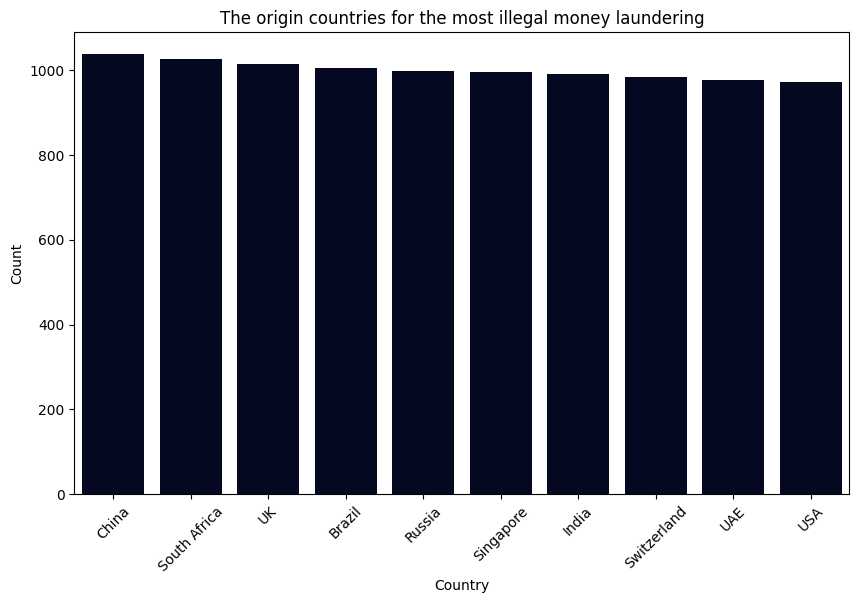

In [14]:
country_counts = df['Country'].value_counts().sort_values(ascending=False)
color = "#%06x" % random.randint(0, 0xFFFFFF)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, color=color)
plt.xticks(rotation=45)
plt.title("The origin countries for the most illegal money laundering")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

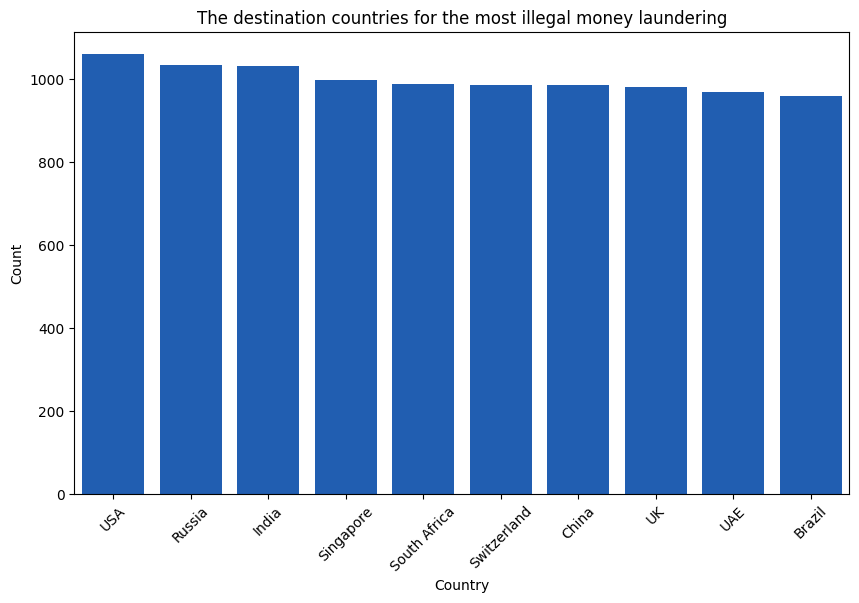

In [15]:
country_counts = df['Destination Country'].value_counts().sort_values(ascending=False)
color = "#%06x" % random.randint(0, 0xFFFFFF)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, color=color)
plt.xticks(rotation=45)
plt.title("The destination countries for the most illegal money laundering")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

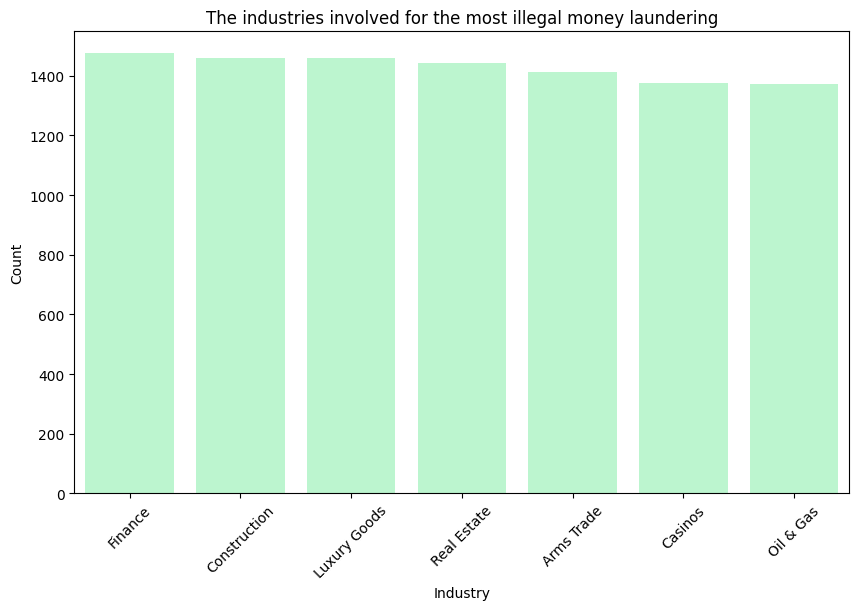

In [16]:
country_counts = df['Industry'].value_counts().sort_values(ascending=False)
color = "#%06x" % random.randint(0, 0xFFFFFF)
# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, color=color)
plt.xticks(rotation=45)
plt.title("The industries involved for the most illegal money laundering")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.show()

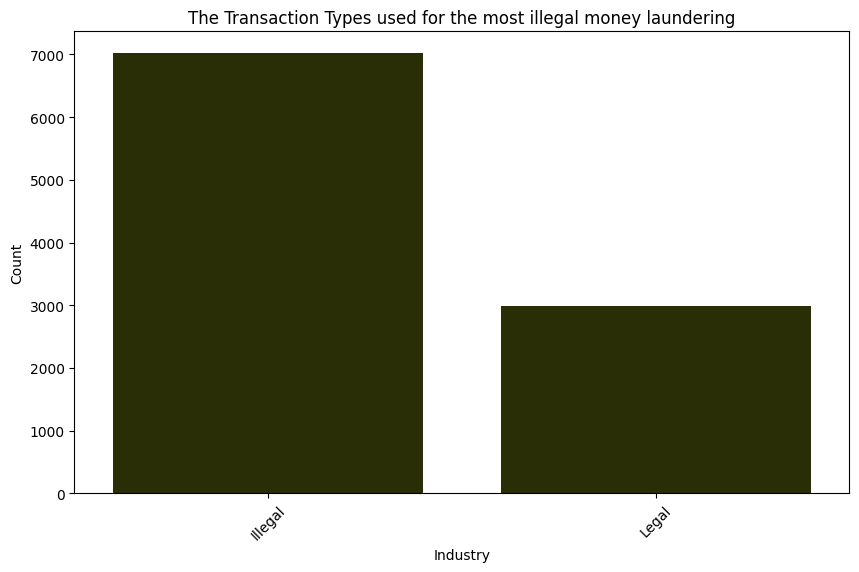

In [17]:
country_counts = df['Source of Money'].value_counts().sort_values(ascending=False)
color = "#%06x" % random.randint(0, 0xFFFFFF)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, color=color)
plt.xticks(rotation=45)
plt.title("The Transaction Types used for the most illegal money laundering")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.show()

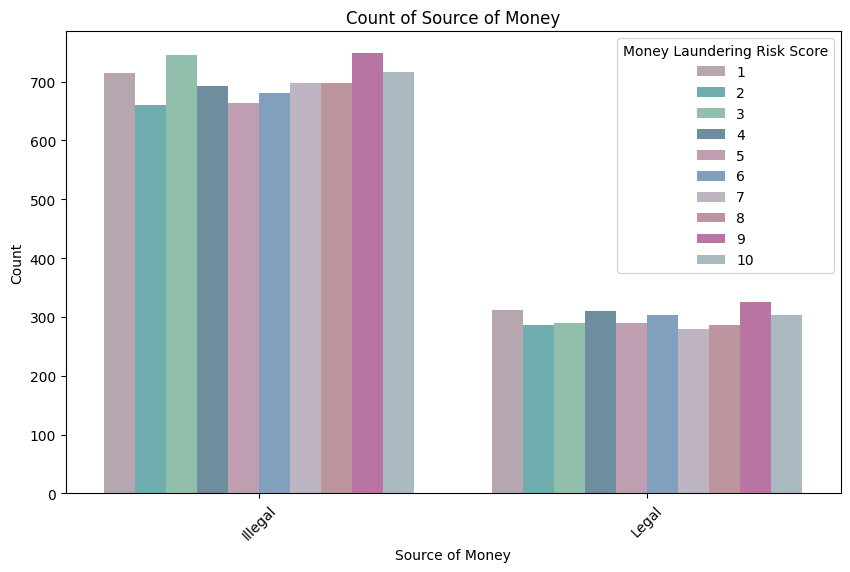

In [18]:
# Sort the DataFrame by "Money Laundering Risk Score" for ascending hue order
df_sorted = df.sort_values(by="Money Laundering Risk Score")

# Generate moderately light colors (values between 150 and 220 for each RGB component)
hue_categories = df_sorted["Money Laundering Risk Score"].nunique()
balanced_colors = ["#%02x%02x%02x" % (random.randint(100, 200), random.randint(100, 200), random.randint(100, 200)) for _ in range(hue_categories)]

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_sorted, x="Source of Money", hue="Money Laundering Risk Score", palette=balanced_colors)
plt.xticks(rotation=45)
plt.title("Count of Source of Money")
plt.xlabel("Source of Money")
plt.ylabel("Count")
plt.show()

The plot shows the distribution of different sources of money, with varying risk scores (1 to 10), allowing for a visual assessment of the risk associated with each source.
I can observe which money sources are more likely to be associated with high-risk money laundering activities. Higher risk sources could guide authorities to focus their monitoring efforts.

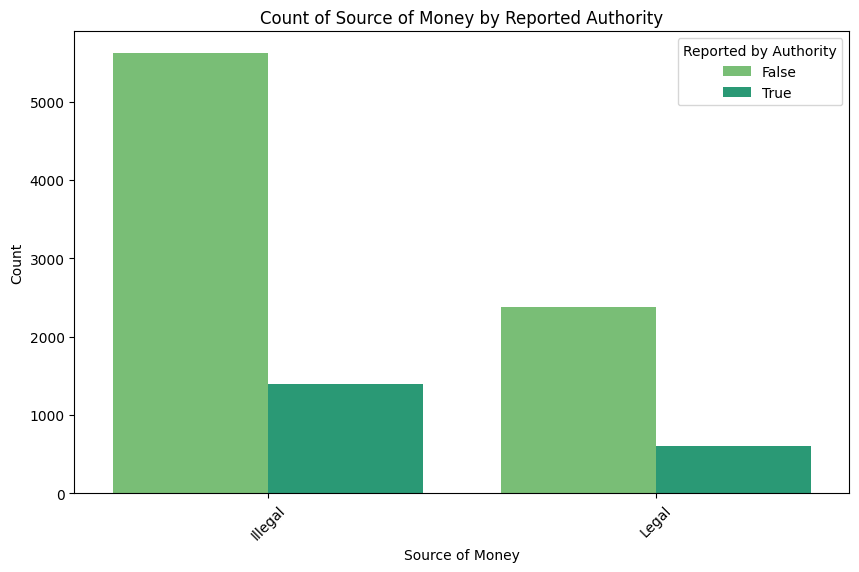

In [19]:
# Generate random colors for each hue category
hue_categories = df["Reported by Authority"].nunique()
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(hue_categories)]

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Source of Money", hue="Reported by Authority", palette=colors)
plt.xticks(rotation=45)
plt.title("Count of Source of Money by Reported Authority")
plt.xlabel("Source of Money")
plt.ylabel("Count")
plt.show()

The chart shows that the majority of illegal transactions are not reported to authorities.
This emphasizes a key issue in the fight against money laundering: a significant portion of illicit transactions is not flagged or reported by institutions, which might allow suspicious activities to continue undetected.

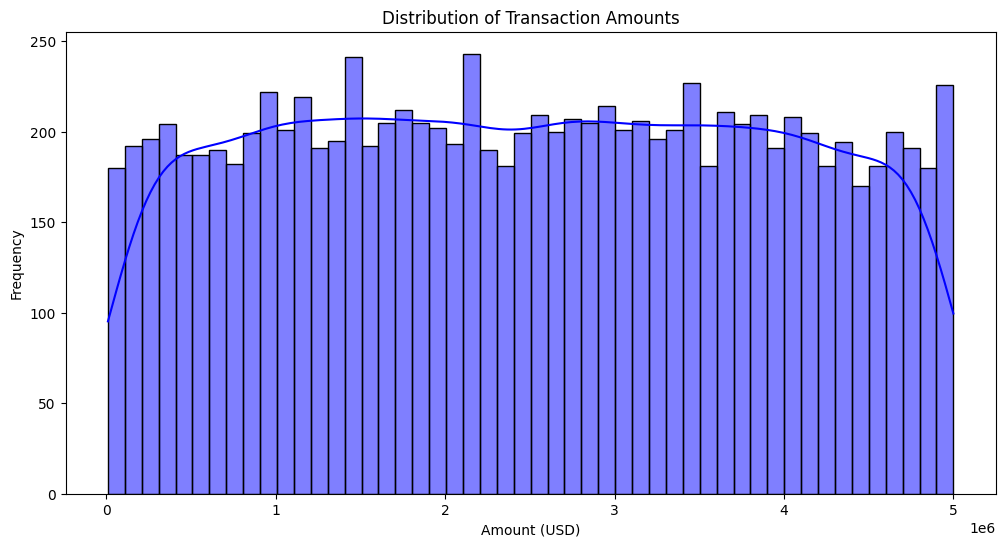

In [20]:
# Distribution of transaction amounts
plt.figure(figsize=(12, 6))
sns.histplot(df['Amount (USD)'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount (USD)')
plt.ylabel('Frequency')
plt.show()

**Money Laundering Risk Analysis**

In [21]:
# Extracting key columns for analysis
risk_analysis_columns = [
    "Amount (USD)",
    "Money Laundering Risk Score",
    "Shell Companies Involved"
]

# Calculating correlation matrix for these columns
correlation_matrix = df[risk_analysis_columns].corr()

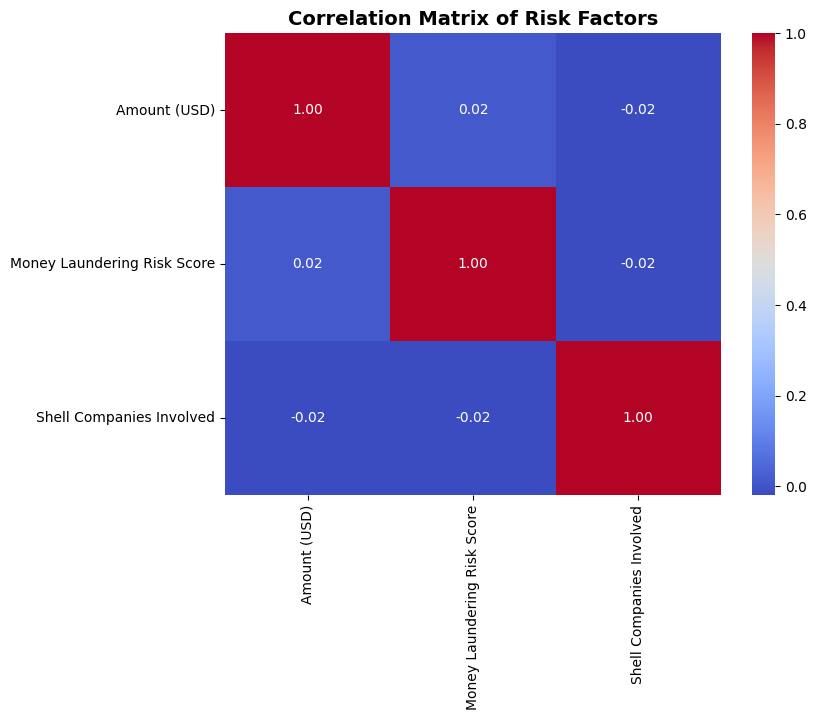

In [22]:
# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix of Risk Factors", fontsize=14, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The heatmap reveals that there is very little correlation between the variables Amount (USD), Money Laundering Risk Score, and Shell Companies Involved. This suggests that these features do not have a strong direct relationship with each other in the context of your dataset.

<ipython-input-23-e626110f0a01>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Shell Companies Involved", y="Money Laundering Risk Score", palette="viridis")


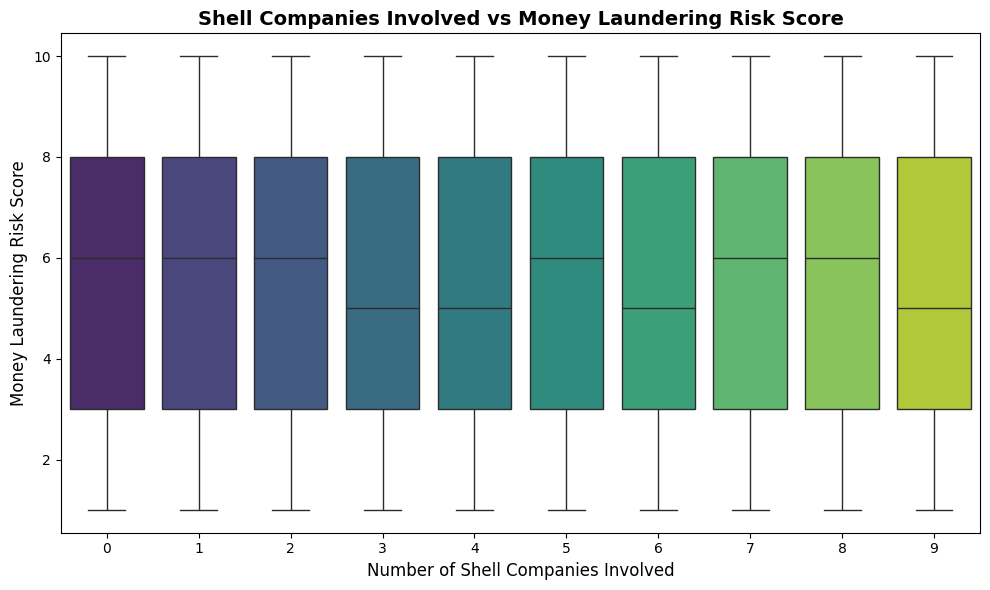

In [23]:
# Plotting distributions of Money Laundering Risk Score by key factors
# Shell Companies vs Risk Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Shell Companies Involved", y="Money Laundering Risk Score", palette="viridis")
plt.title("Shell Companies Involved vs Money Laundering Risk Score", fontsize=14, weight='bold')
plt.xlabel("Number of Shell Companies Involved", fontsize=12)
plt.ylabel("Money Laundering Risk Score", fontsize=12)
plt.tight_layout()
plt.show()

The plot shows that the Money Laundering Risk Score remains relatively consistent across different numbers of shell companies involved, with a slight increase in risk scores when 5 or more shell companies are involved.
Insight: This suggests that the number of shell companies involved does not drastically affect the money laundering risk score, though there is a slight upward trend in risk with more shell companies.

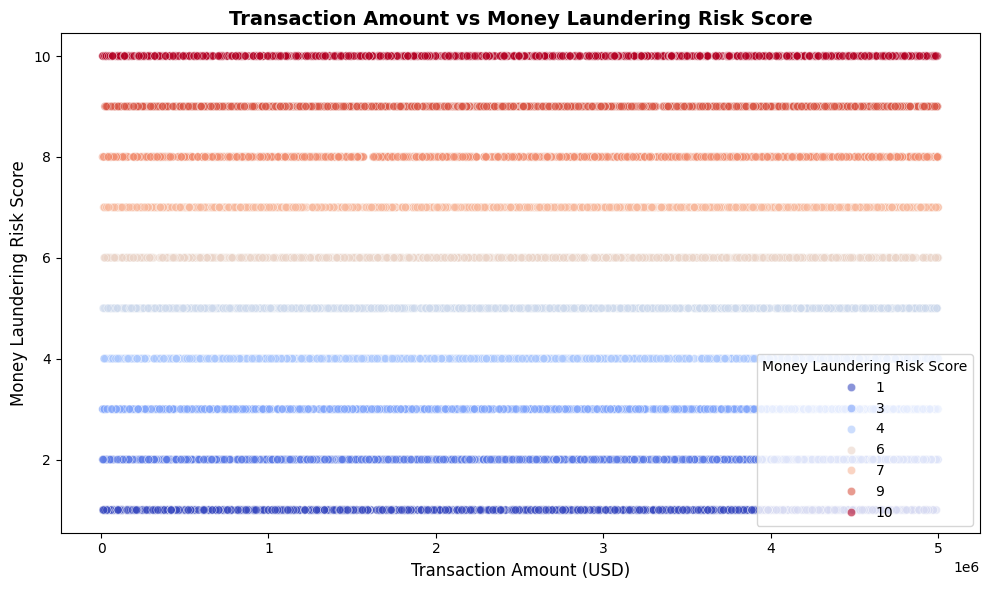

In [24]:
# Transaction Amount vs Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Amount (USD)", y="Money Laundering Risk Score", alpha=0.6, hue="Money Laundering Risk Score", palette="coolwarm")
plt.title("Transaction Amount vs Money Laundering Risk Score", fontsize=14, weight='bold')
plt.xlabel("Transaction Amount (USD)", fontsize=12)
plt.ylabel("Money Laundering Risk Score", fontsize=12)
plt.tight_layout()
plt.show()

Larger transactions do not necessarily correlate with higher money laundering risk, indicating that the amount alone is not a reliable factor for predicting the risk of money laundering.

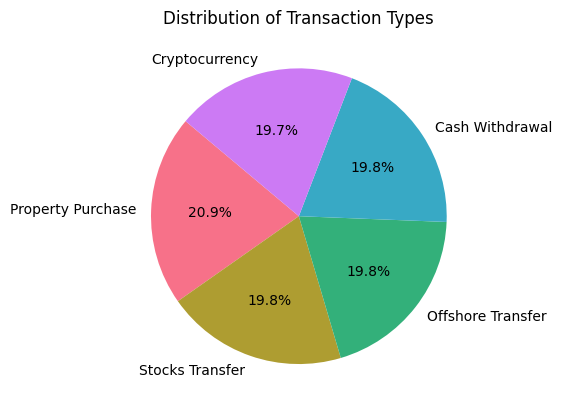

In [25]:
df['Transaction Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('husl', n_colors=df['Transaction Type'].nunique()))
plt.title('Distribution of Transaction Types')
plt.ylabel('')
plt.show()

The distribution of transaction types is almost evenly spread across the five transaction types: Cryptocurrency, Property Purchase, Offshore Transfer, Cash Withdrawal, and Stocks Transfer, with each type around 19-21%.

This indicates that there is no dominant transaction type in this dataset, and the illegal financial activities are distributed across various transaction methods.

In [26]:
df['Source of Money'].unique()

<StringArray>
['Illegal', 'Legal']
Length: 2, dtype: string

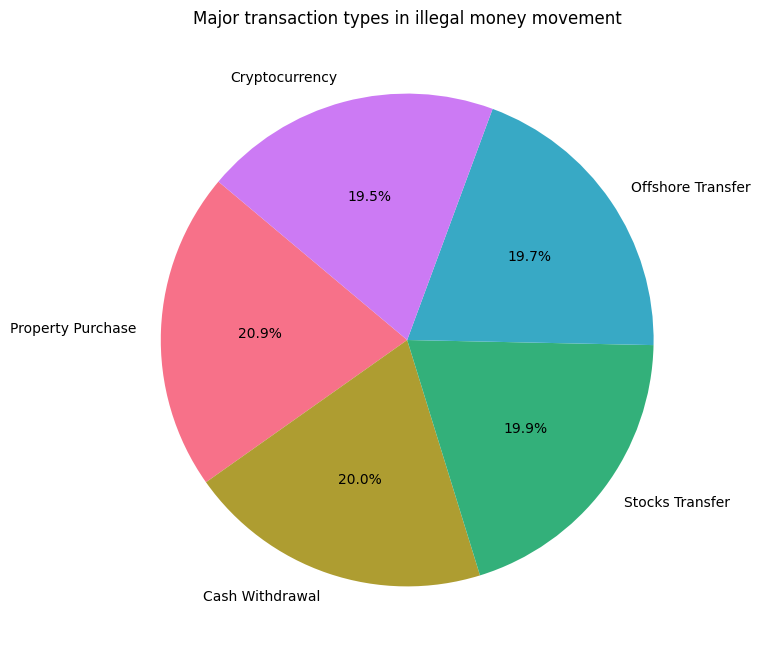

In [27]:
# how black money is moved
df_sub = df[df['Source of Money']=="Illegal"]


plt.figure(figsize=(10, 8))
df_sub['Transaction Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('husl', n_colors=df_sub['Transaction Type'].nunique()))
plt.title('Major transaction types in illegal money movement')
plt.ylabel('')
plt.show()

The chart reveals that illegal transactions are distributed similarly to all transactions. However, the proportion of Property Purchase and Cryptocurrency seems slightly higher.

These two transaction types play a significant role in illegal money movements, suggesting that these methods might be frequently used to launder money.

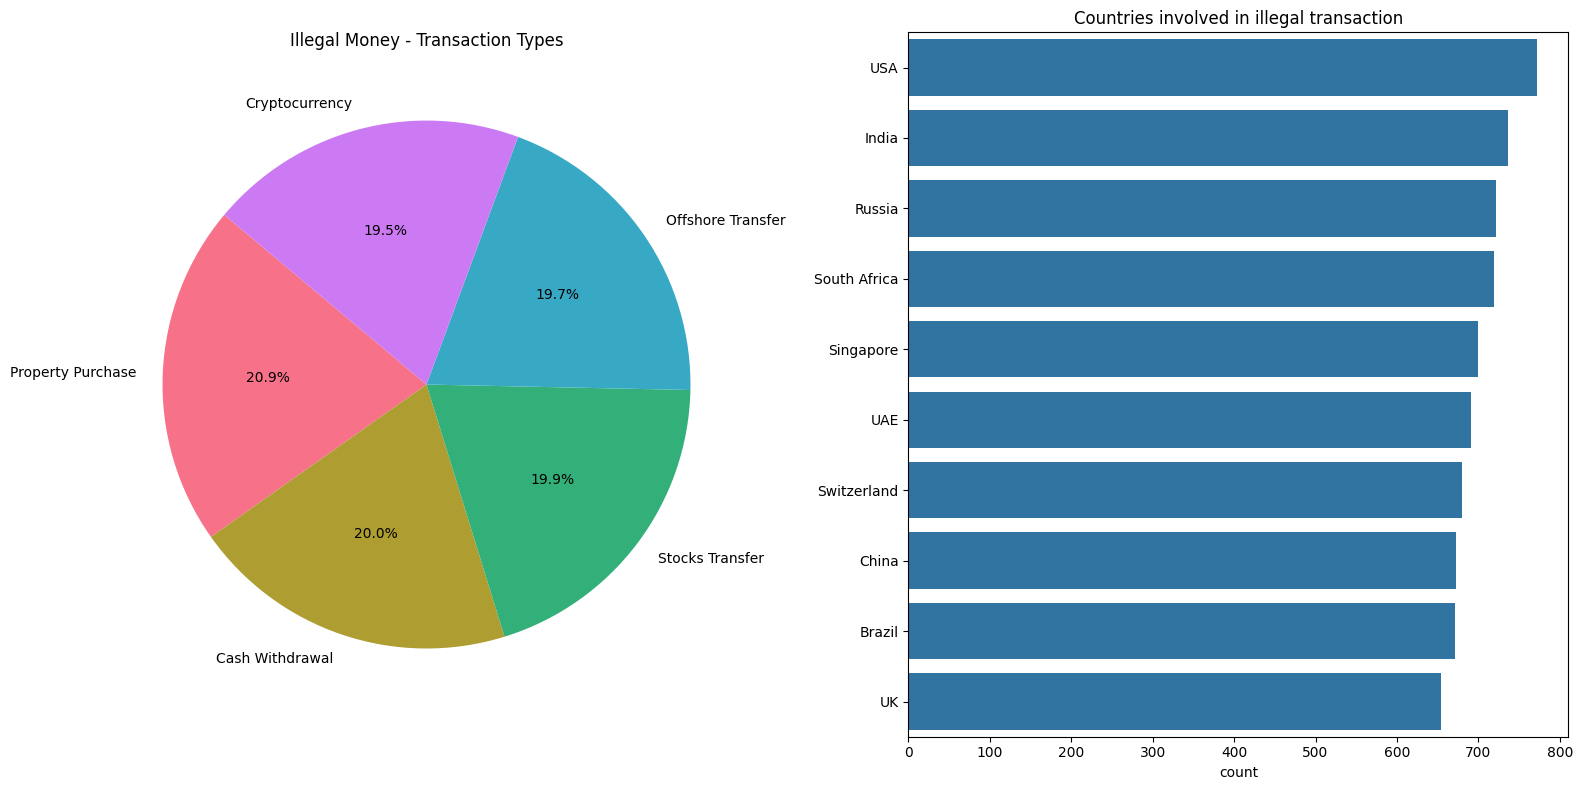

In [28]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for illegal money
df_sub['Transaction Type'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('husl', n_colors=df_sub['Transaction Type'].nunique()),
    ax=axes[0]
)
axes[0].set_title('Illegal Money - Transaction Types')
axes[0].set_ylabel('')

# Pie chart for legal money
order = df_sub["Destination Country"].value_counts(ascending=False).index
# Create the countplot with the sorted order
sns.countplot(data=df_sub, y="Destination Country", order=order)
axes[1].set_title('Countries involved in illegal transaction')
axes[1].set_ylabel('')

# Show the plots
plt.tight_layout()
plt.show()

The USA and India are key players in illegal money movement. The bar chart helps identify which countries are involved in the most illicit financial activities.

In [29]:
df_sub

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,TX0000009992,Switzerland,1.679869e+06,Cash Withdrawal,2014-02-21 07:00:00,Person_9785,Luxury Goods,South Africa,False,Illegal,1,9,Bank_196,Bahamas
9993,TX0000009994,Russia,3.886784e+06,Cryptocurrency,2014-02-21 09:00:00,Person_4031,Luxury Goods,India,False,Illegal,1,7,Bank_251,Cayman Islands
9995,TX0000009996,Singapore,2.209229e+06,Offshore Transfer,2014-02-21 11:00:00,Person_6896,Real Estate,Brazil,False,Illegal,4,4,Bank_258,Luxembourg
9997,TX0000009998,UK,4.891953e+05,Stocks Transfer,2014-02-21 13:00:00,Person_4171,Oil & Gas,Russia,False,Illegal,5,0,Bank_156,Cayman Islands


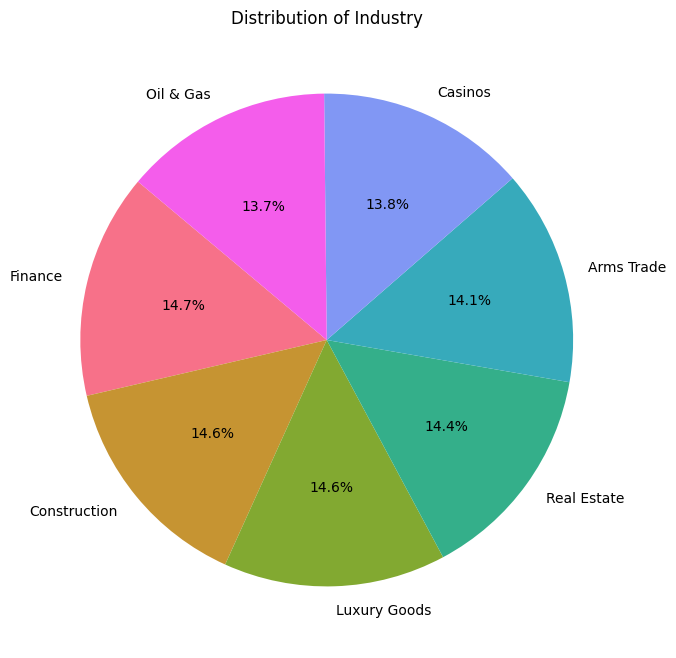

In [30]:
plt.figure(figsize=(10, 8))
df['Industry'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('husl', n_colors=df['Industry'].nunique()))
plt.title('Distribution of Industry')
plt.ylabel('')
plt.show()

The industries are more equally distributed, but Oil & Gas and Casinos stand out as major contributors to illegal money laundering activities.

Certain industries, particularly Oil & Gas and Casinos, are more prone to illegal money laundering, possibly due to their complex financial operations or high cash flow activities.

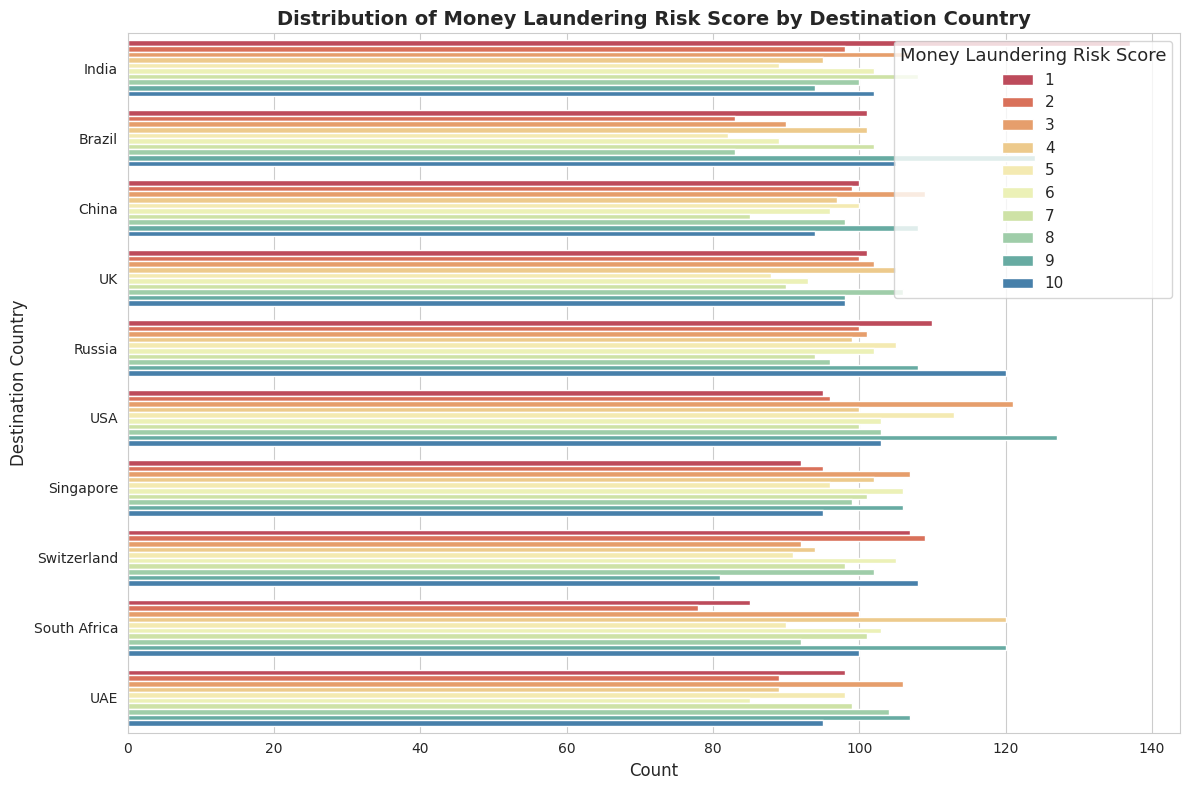

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Sort the DataFrame by "Money Laundering Risk Score" for ascending hue order
df_sorted = df.sort_values(by="Money Laundering Risk Score")

# Use a predefined color palette for a more cohesive look
palette = sns.color_palette("Spectral", df_sorted["Money Laundering Risk Score"].nunique())

# Create the plot
plt.figure(figsize=(12, 8))
sns.countplot(data=df_sorted, y="Destination Country", hue="Money Laundering Risk Score", palette=palette)
plt.title("Distribution of Money Laundering Risk Score by Destination Country", fontsize=14, weight='bold')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Destination Country", fontsize=12)

# Add a legend title
plt.legend(title="Money Laundering Risk Score", title_fontsize='13', fontsize='11')

# Show the plot
plt.tight_layout()
plt.show()


The first plot is a horizontal bar plot showing the distribution of money laundering risk scores by Destination Country.

The second plot is a boxplot showing the spread of money laundering risk scores across countries

The USA and South Africa show a greater number of high-risk transactions, and the spread in risk scores across countries indicates varying degrees of money laundering activity. The UAE, with a narrower spread, could suggest more consistent money laundering behavior.


<ipython-input-32-e67b956a5ac5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Destination Country", y="Money Laundering Risk Score", palette="Spectral")


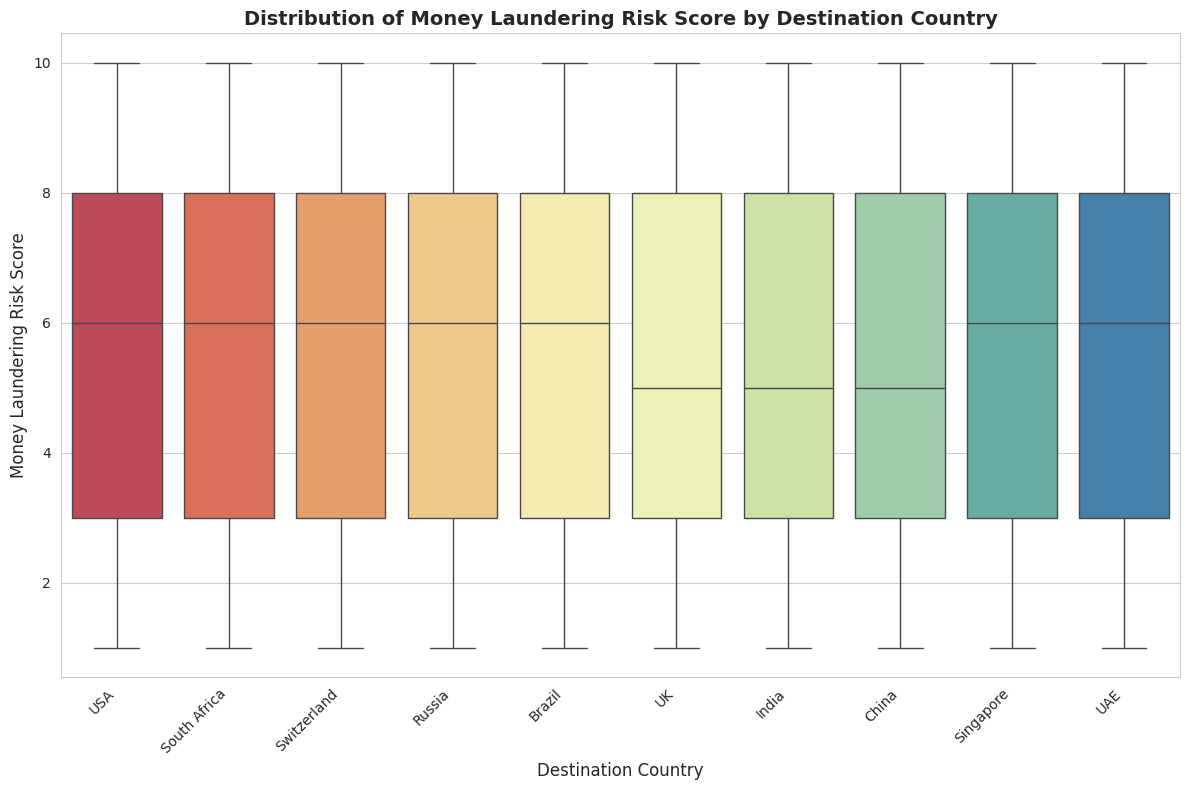

In [32]:
import matplotlib.pyplot as plt
# Set plot style
sns.set_style("whitegrid")
# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="Destination Country", y="Money Laundering Risk Score", palette="Spectral")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Distribution of Money Laundering Risk Score by Destination Country", fontsize=14, weight='bold')
plt.xlabel("Destination Country", fontsize=12)
plt.ylabel("Money Laundering Risk Score", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


Risk Concentration:

USA, South Africa, and Switzerland have a higher concentration of higher risk scores (close to 8-9), suggesting that these countries are often involved in higher-risk money laundering activities.

UAE has a lower spread, suggesting it may involve transactions with more consistent, possibly lower, money laundering risk.
Spread of Risk Scores:

UAE and Singapore appear to have less variability in the risk scores, with the boxplot showing smaller interquartile ranges, which could mean that transactions in these countries tend to be less risky overall compared to others.

The USA and South Africa have wider ranges, showing more variability in the risk scores.

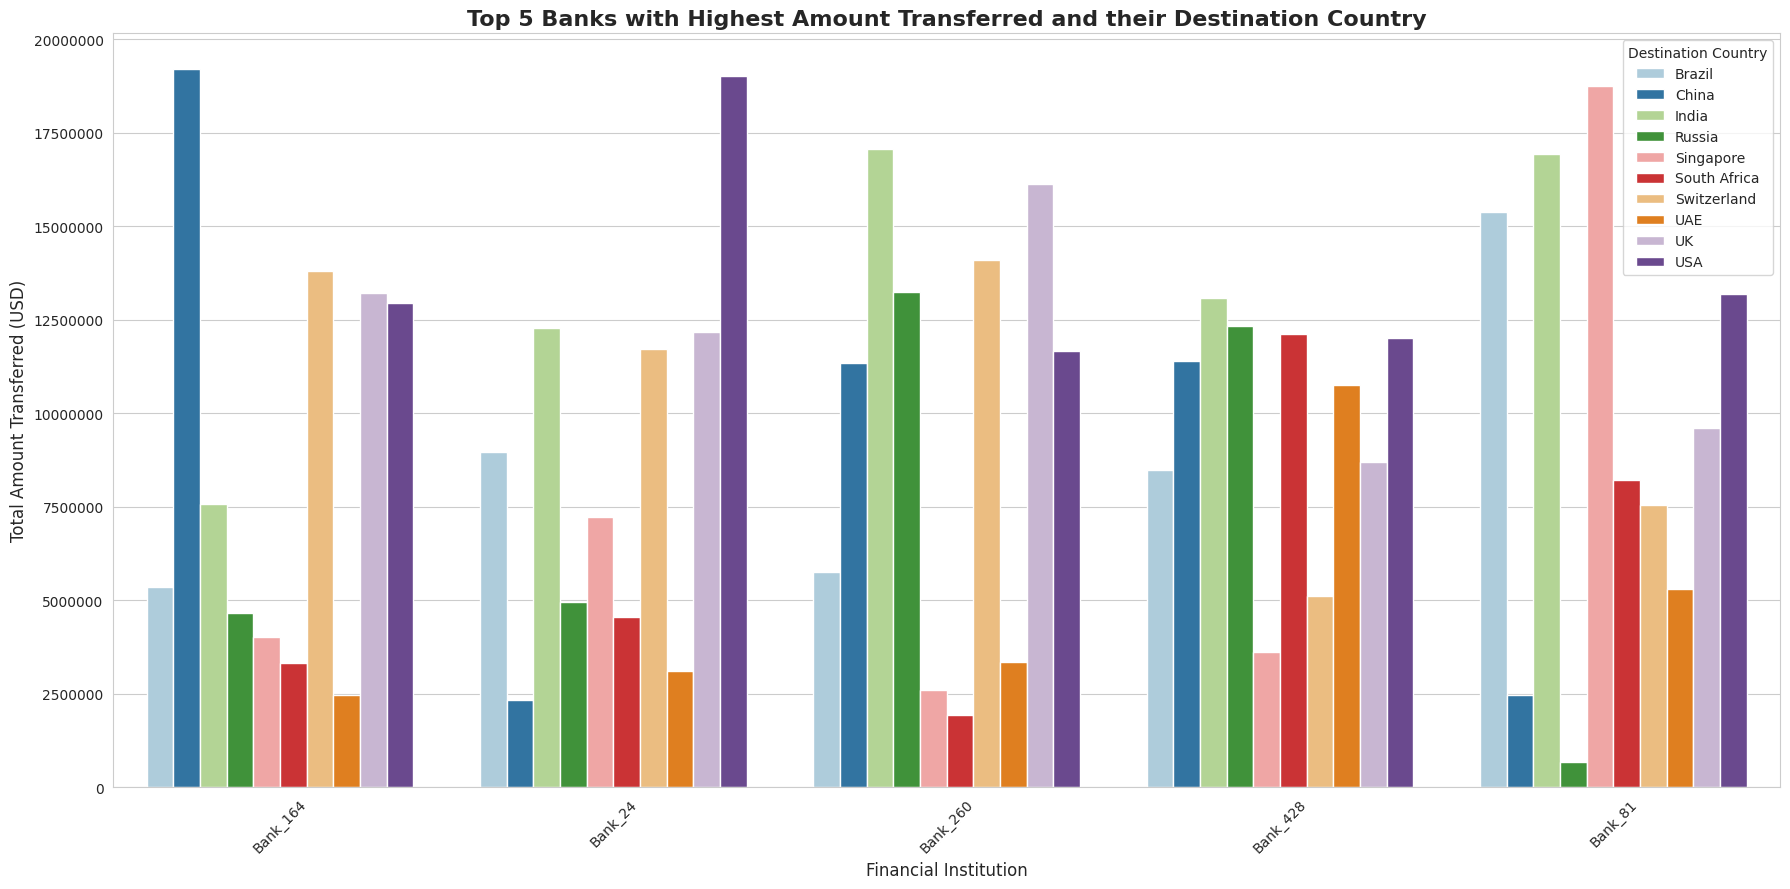

In [33]:
# Aggregate data to get the total amount for each financial institution and destination country
total_amounts = df.groupby(['Financial Institution', 'Destination Country'])['Amount (USD)'].sum().reset_index()

# Get the top 5 financial institutions with the highest amounts
top_banks = total_amounts.groupby('Financial Institution')['Amount (USD)'].sum().nlargest(5).index

# Filter to keep only the rows for these top banks
top_banks_data = total_amounts[total_amounts['Financial Institution'].isin(top_banks)]

# Create a bar plot for the top banks and their destination countries
plt.figure(figsize=(18, 9))
sns.barplot(data=top_banks_data, x='Financial Institution', y='Amount (USD)', hue='Destination Country', palette='Paired')

# Plot aesthetics
plt.title('Top 5 Banks with Highest Amount Transferred and their Destination Country', fontsize=16, weight='bold')
plt.xlabel('Financial Institution', fontsize=12)
plt.ylabel('Total Amount Transferred (USD)', fontsize=12)
plt.xticks(rotation=45)

# Set y-axis to display without scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Adjust layout and show plot
plt.tight_layout()
plt.legend(title='Destination Country')
plt.show()

Banks with High Transaction Volume: Bank_164 stands out as the bank handling the highest volume of transfers. It has several countries as key destinations, with the USA, China, and Brazil being prominent.

Countries of Transfer: The chart helps identify countries involved in illegal or high-risk money transfers, with major countries like USA, China, Brazil, and South Africa being consistently present across the top banks.

Destination Country Trends: By visualizing the destination country for each financial institution, you can identify global trends in money transfers. It highlights the importance of regions like South Africa, USA, and China in money laundering activities.

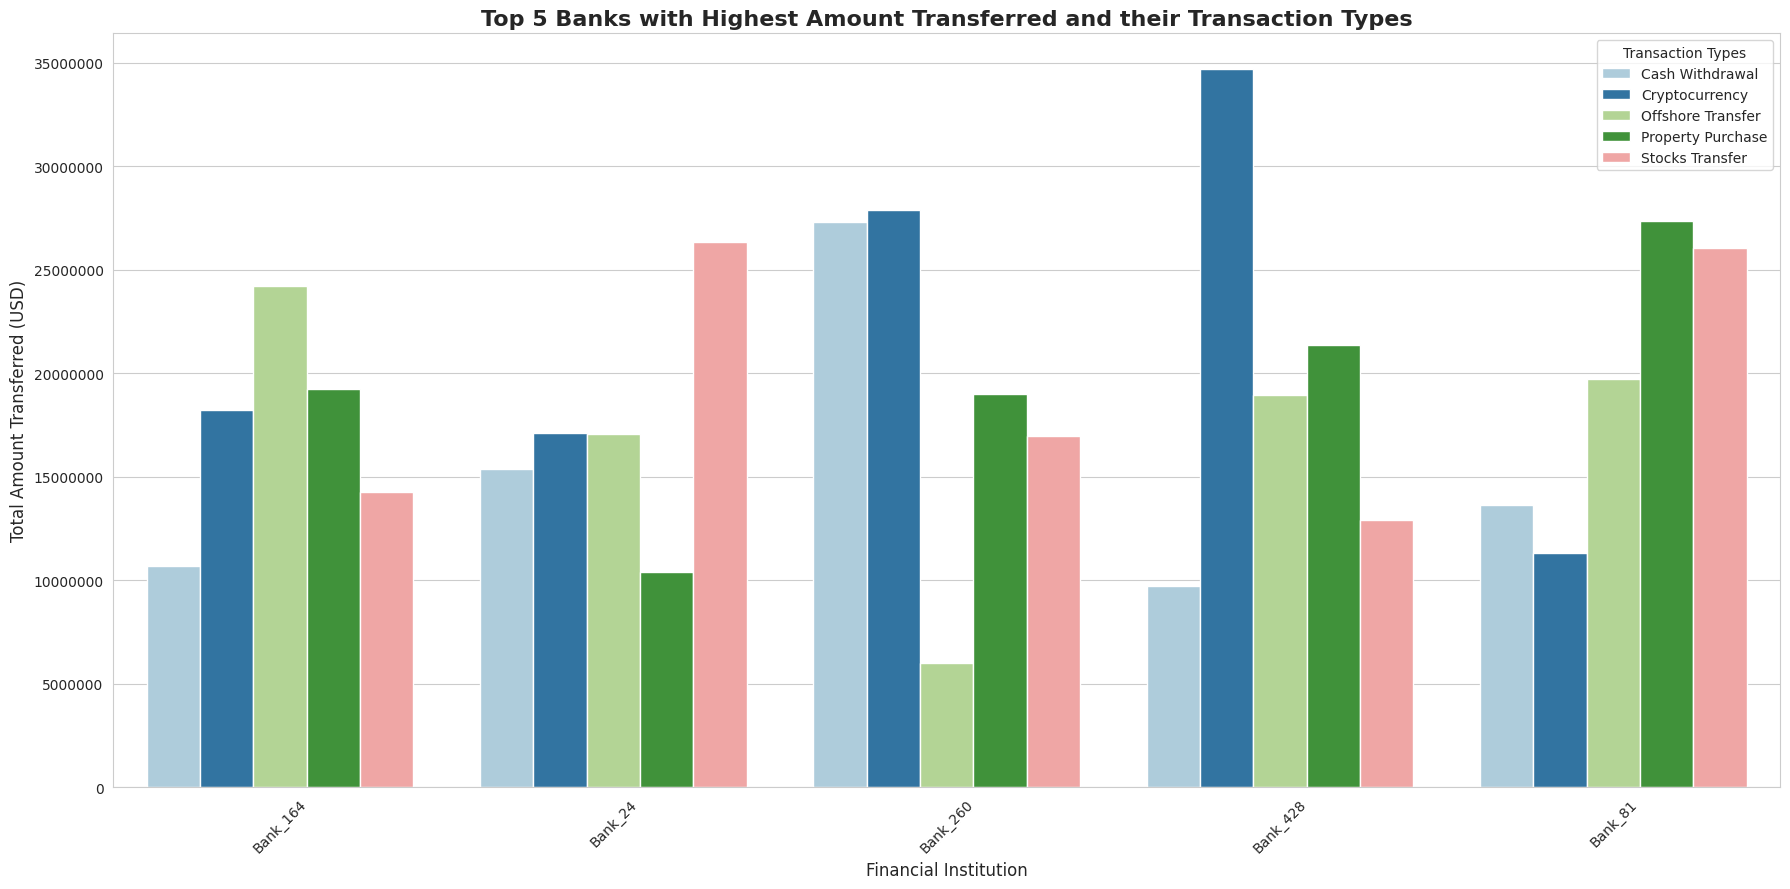

In [34]:
# Aggregate data to get the total amount for each financial institution and destination country
total_amounts = df.groupby(['Financial Institution', 'Transaction Type'])['Amount (USD)'].sum().reset_index()

# Get the top 5 financial institutions with the highest amounts
top_banks = total_amounts.groupby('Financial Institution')['Amount (USD)'].sum().nlargest(5).index

# Filter to keep only the rows for these top banks
top_banks_data = total_amounts[total_amounts['Financial Institution'].isin(top_banks)]

# Create a bar plot for the top banks and their destination countries
plt.figure(figsize=(18, 9))
sns.barplot(data=top_banks_data, x='Financial Institution', y='Amount (USD)', hue='Transaction Type', palette='Paired')

# Plot aesthetics
plt.title('Top 5 Banks with Highest Amount Transferred and their Transaction Types', fontsize=16, weight='bold')
plt.xlabel('Financial Institution', fontsize=12)
plt.ylabel('Total Amount Transferred (USD)', fontsize=12)
plt.xticks(rotation=45)

# Set y-axis to display without scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Adjust layout and show plot
plt.tight_layout()
plt.legend(title='Transaction Types')
plt.show()

Bank_164 stands out as the bank with the highest total amount transferred, with the largest share coming from Offshore Transfers and Cash Withdrawals.

Bank_428 also shows significant transfers, especially in Offshore Transfers.

Bank_81 has relatively balanced transfers across different types of transactions, with Stocks Transfer showing a notable portion.

Bank_260 and Bank_24 show a more even distribution across the transaction types, though Bank_260 has a higher share of Cryptocurrency.

<ipython-input-35-2ea193290dda>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg, x='Month', y='Amount (USD)', ax=axes[i], palette='viridis')
<ipython-input-35-2ea193290dda>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg, x='Month', y='Amount (USD)', ax=axes[i], palette='viridis')
<ipython-input-35-2ea193290dda>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg, x='Month', y='Amount (USD)', ax=axes[i], palette='viridis')
<ipython-input-35-2ea193290dda>:23: FutureWarning: 

Passing `palet

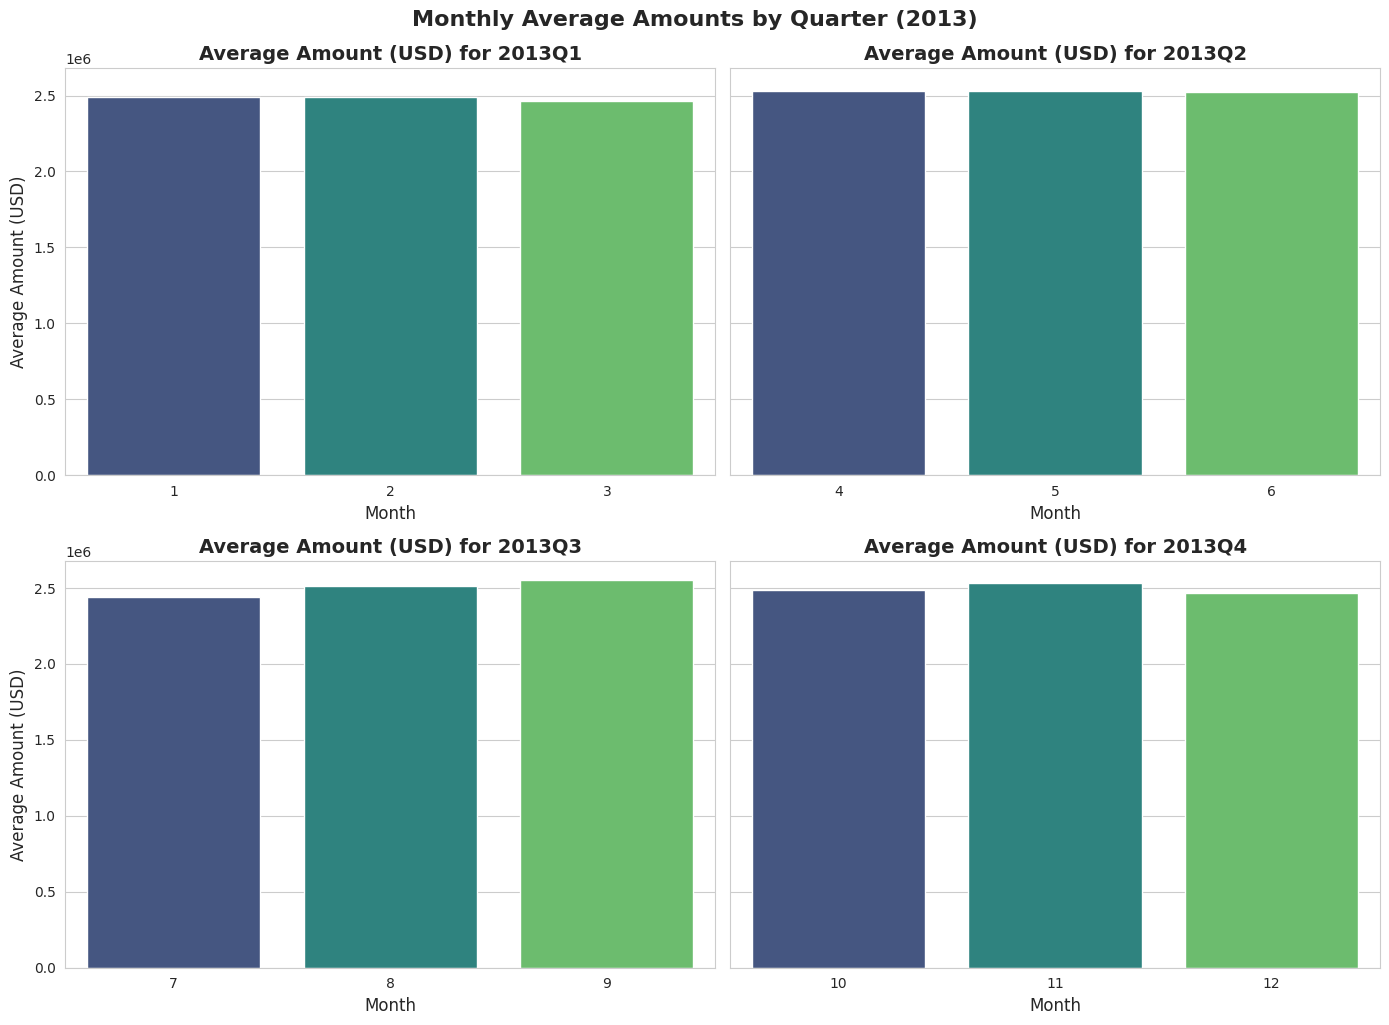

In [35]:
# Convert 'Date of Transaction' to datetime
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])

# Add a column for the month and quarter
df['Month'] = df['Date of Transaction'].dt.month
df['Quarter'] = df['Date of Transaction'].dt.to_period('Q')

# Create a figure with subplots for each quarter
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axes = axes.flatten()  # Flatten to easily access each subplot

# Define quarters for labeling
quarters = ['2013Q1', '2013Q2', '2013Q3', '2013Q4']

for i, quarter in enumerate(quarters):
    # Filter data for each quarter
    quarter_data = df[df['Quarter'] == quarter]

    # Calculate monthly averages for each month in the quarter
    monthly_avg = quarter_data.groupby(['Month'])['Amount (USD)'].mean().reset_index()

    # Create the plot for the quarter
    sns.barplot(data=monthly_avg, x='Month', y='Amount (USD)', ax=axes[i], palette='viridis')

    # Plot aesthetics
    axes[i].set_title(f'Average Amount (USD) for {quarter}', fontsize=14, weight='bold')
    axes[i].set_xlabel('Month', fontsize=12)
    axes[i].set_ylabel('Average Amount (USD)', fontsize=12)
    # axes[i].set_xticks(range(1, 13))  # Set x-ticks to represent months
    # axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
    # axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.suptitle('Monthly Average Amounts by Quarter (2013)', fontsize=16, weight='bold', y=1.02)
plt.show()

Interpretation:

The monthly average amounts for each quarter of 2013 are plotted in individual bar plots for each quarter.

For each quarter (Q1, Q2, Q3, Q4), the monthly data is presented, showing a consistent amount transferred across the months in each quarter, without significant fluctuations.

Insights:

Consistency: There is little variation in the average amount transferred across months in each quarter, suggesting a steady flow of transactions throughout the year.

The average amount transferred in each month of a quarter is almost the same for each quarter (2013Q1 to 2013Q4), with the data showing no major peaks or drops.

This could indicate stable financial activities in terms of transaction amounts during 2013, with no significant fluctuations in the transfer amounts month by month.

<ipython-input-36-528dc13e2ab4>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=monthly_avg, x='Month', y='Amount (USD)', marker='o', palette='viridis')


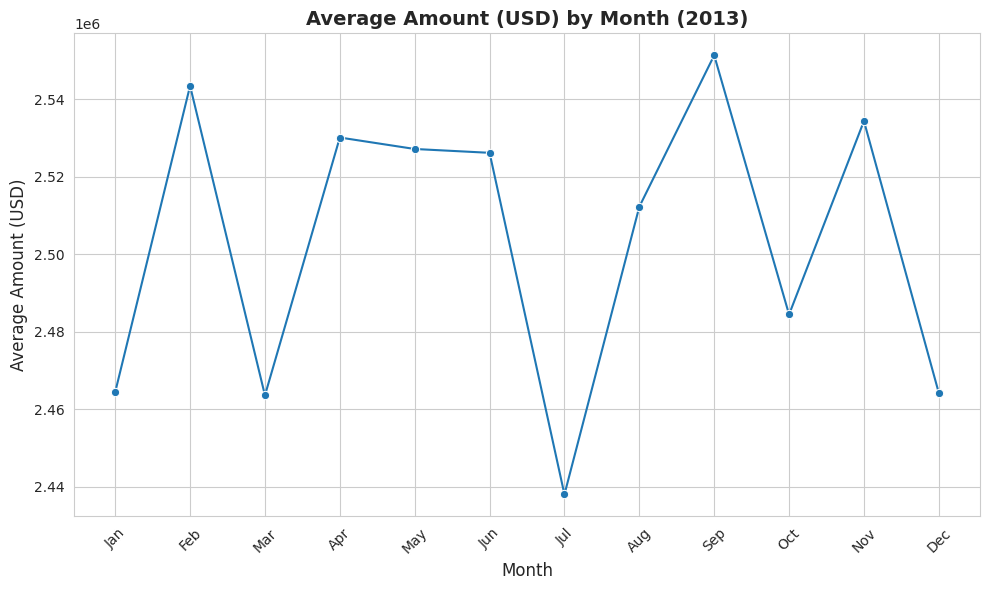

In [36]:
# Convert 'Date of Transaction' to datetime
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])

# Add a column for the month
df['Month'] = df['Date of Transaction'].dt.month

# Calculate monthly averages
monthly_avg = df.groupby(['Month'])['Amount (USD)'].mean().reset_index()

# Create a single plot for monthly averages
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg, x='Month', y='Amount (USD)', marker='o', palette='viridis')

# Plot aesthetics
plt.title('Average Amount (USD) by Month (2013)', fontsize=14, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Amount (USD)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

The highest amount transferred was observed in April and September, with a noticeable dip in July.

The average amount seems to generally fluctuate around the range of 2.46 million USD to 2.54 million USD.

The decline in July is quite sharp, suggesting a potential anomaly or significant reduction in transactions for that month.

Consistency is observed in June, August, and December, where the average transaction amounts are relatively stable.

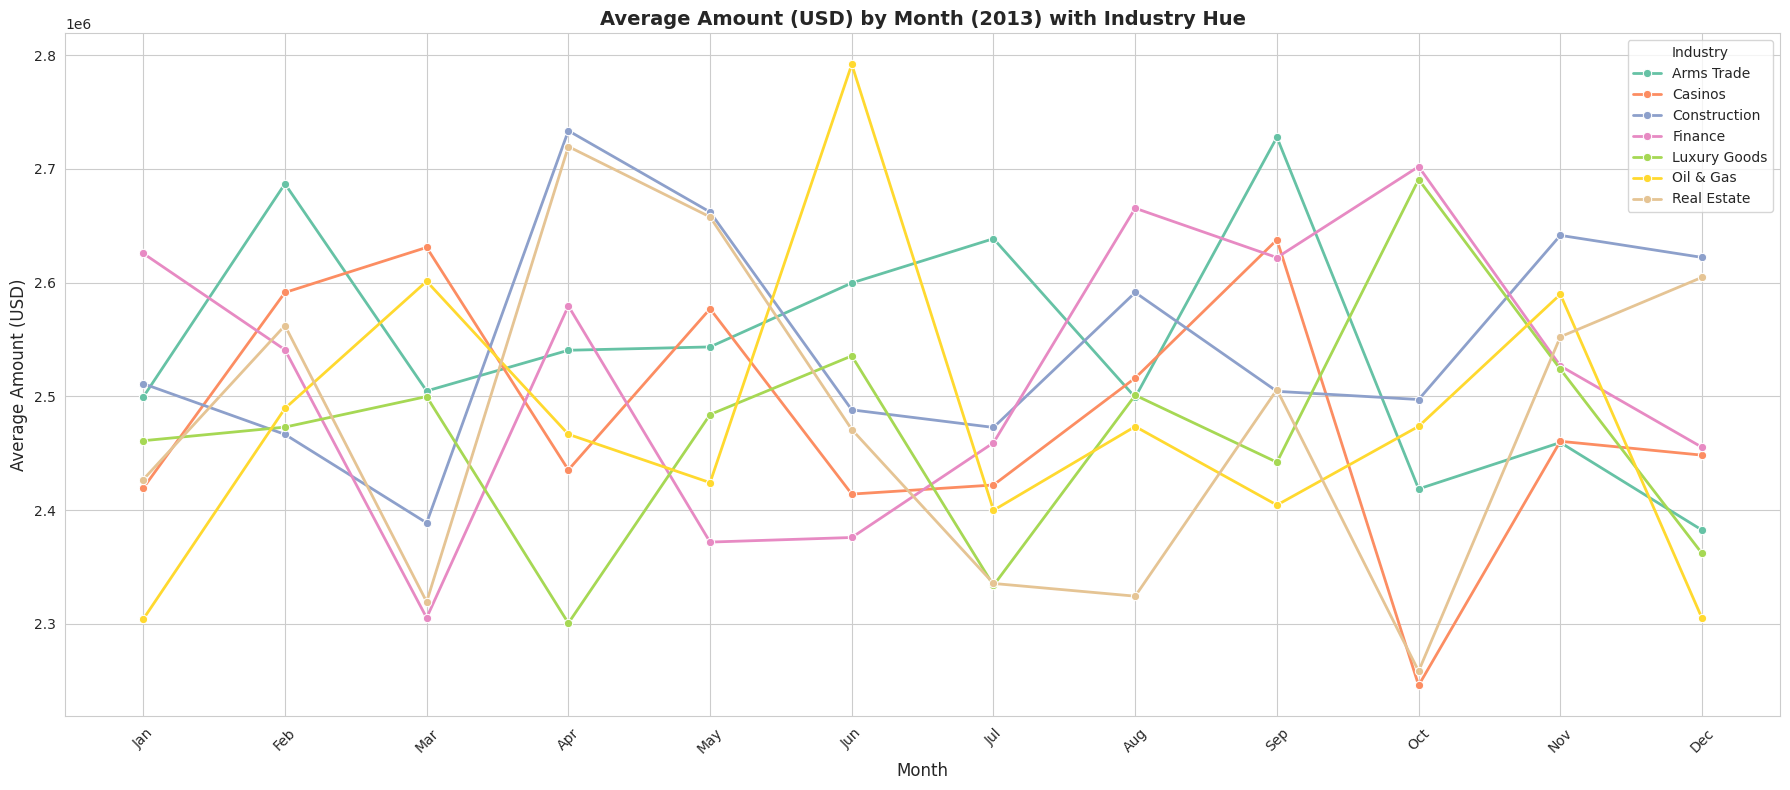

In [37]:
# Convert 'Date of Transaction' to datetime
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])

# Add a column for the month
df['Month'] = df['Date of Transaction'].dt.month

# Calculate monthly averages grouped by Month and Industry
monthly_avg = df.groupby(['Month', 'Industry'])['Amount (USD)'].mean().reset_index()

# Create a single plot for monthly averages with hue
plt.figure(figsize=(18, 8))
sns.lineplot(data=monthly_avg, x='Month', y='Amount (USD)', marker='o', hue='Industry', palette='Set2', linewidth=2)

# Plot aesthetics
plt.title('Average Amount (USD) by Month (2013) with Industry Hue', fontsize=14, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Amount (USD)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.legend(title='Industry')
plt.show()

In [38]:
df.columns

Index(['Transaction ID', 'Country', 'Amount (USD)', 'Transaction Type',
       'Date of Transaction', 'Person Involved', 'Industry',
       'Destination Country', 'Reported by Authority', 'Source of Money',
       'Money Laundering Risk Score', 'Shell Companies Involved',
       'Financial Institution', 'Tax Haven Country', 'Month', 'Quarter'],
      dtype='object')

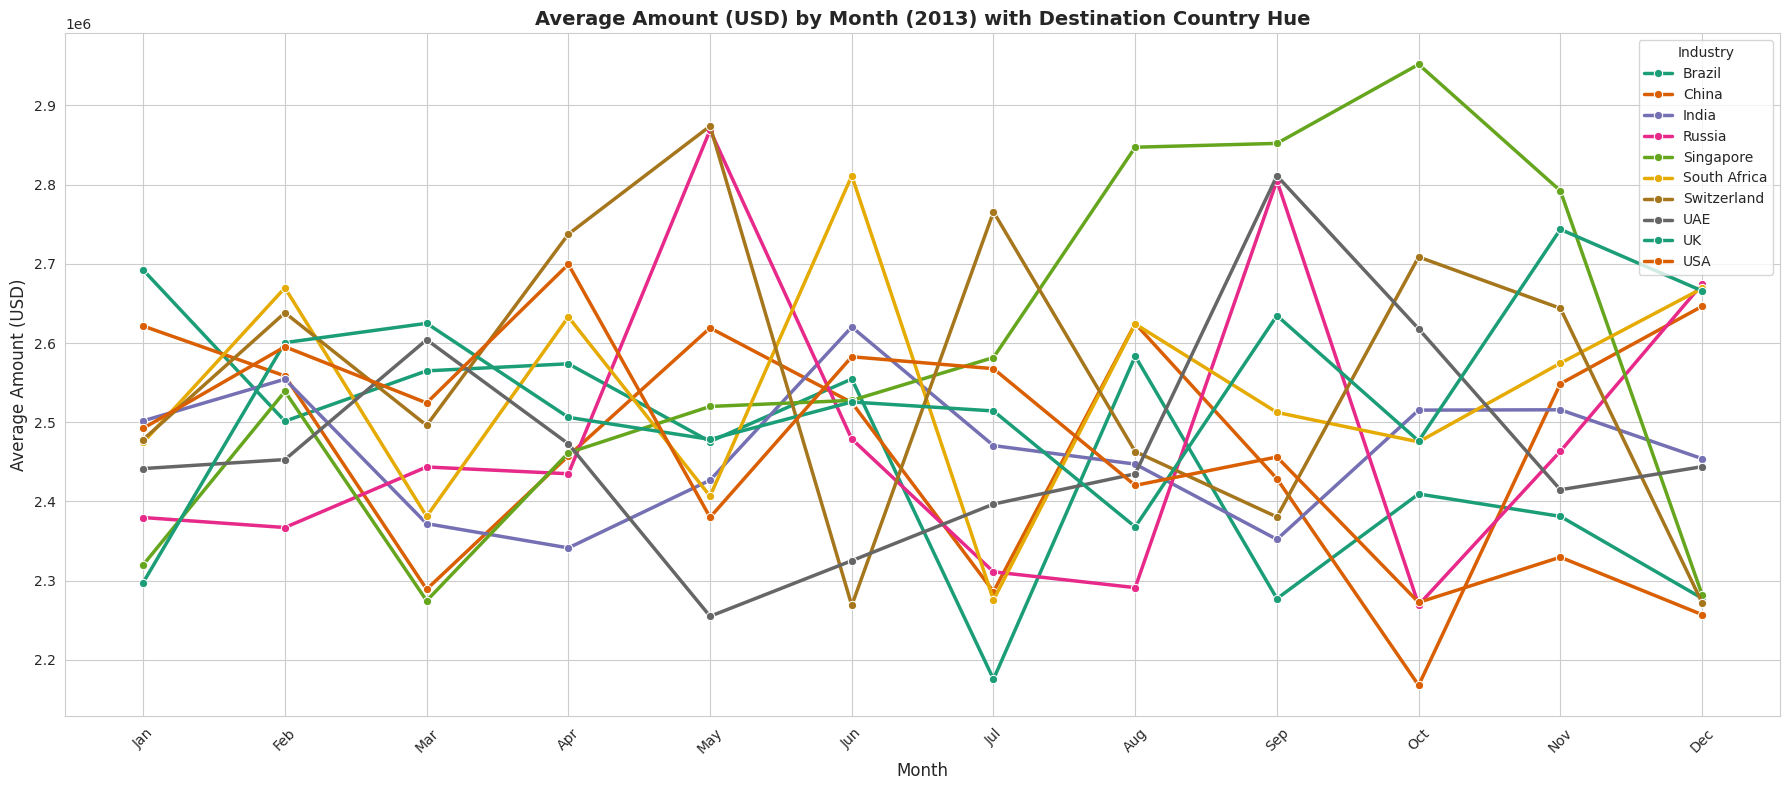

In [39]:
# Convert 'Date of Transaction' to datetime
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])

# Add a column for the month
df['Month'] = df['Date of Transaction'].dt.month

# Calculate monthly averages grouped by Month and Industry
monthly_avg = df.groupby(['Month', 'Destination Country'])['Amount (USD)'].mean().reset_index()

# Create a single plot for monthly averages with hue
plt.figure(figsize=(18, 8))
sns.lineplot(data=monthly_avg, x='Month', y='Amount (USD)', marker='o', hue='Destination Country', palette='Dark2', linewidth=2.5)

# Plot aesthetics
plt.title('Average Amount (USD) by Month (2013) with Destination Country Hue', fontsize=14, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Amount (USD)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.legend(title='Industry')
plt.show()

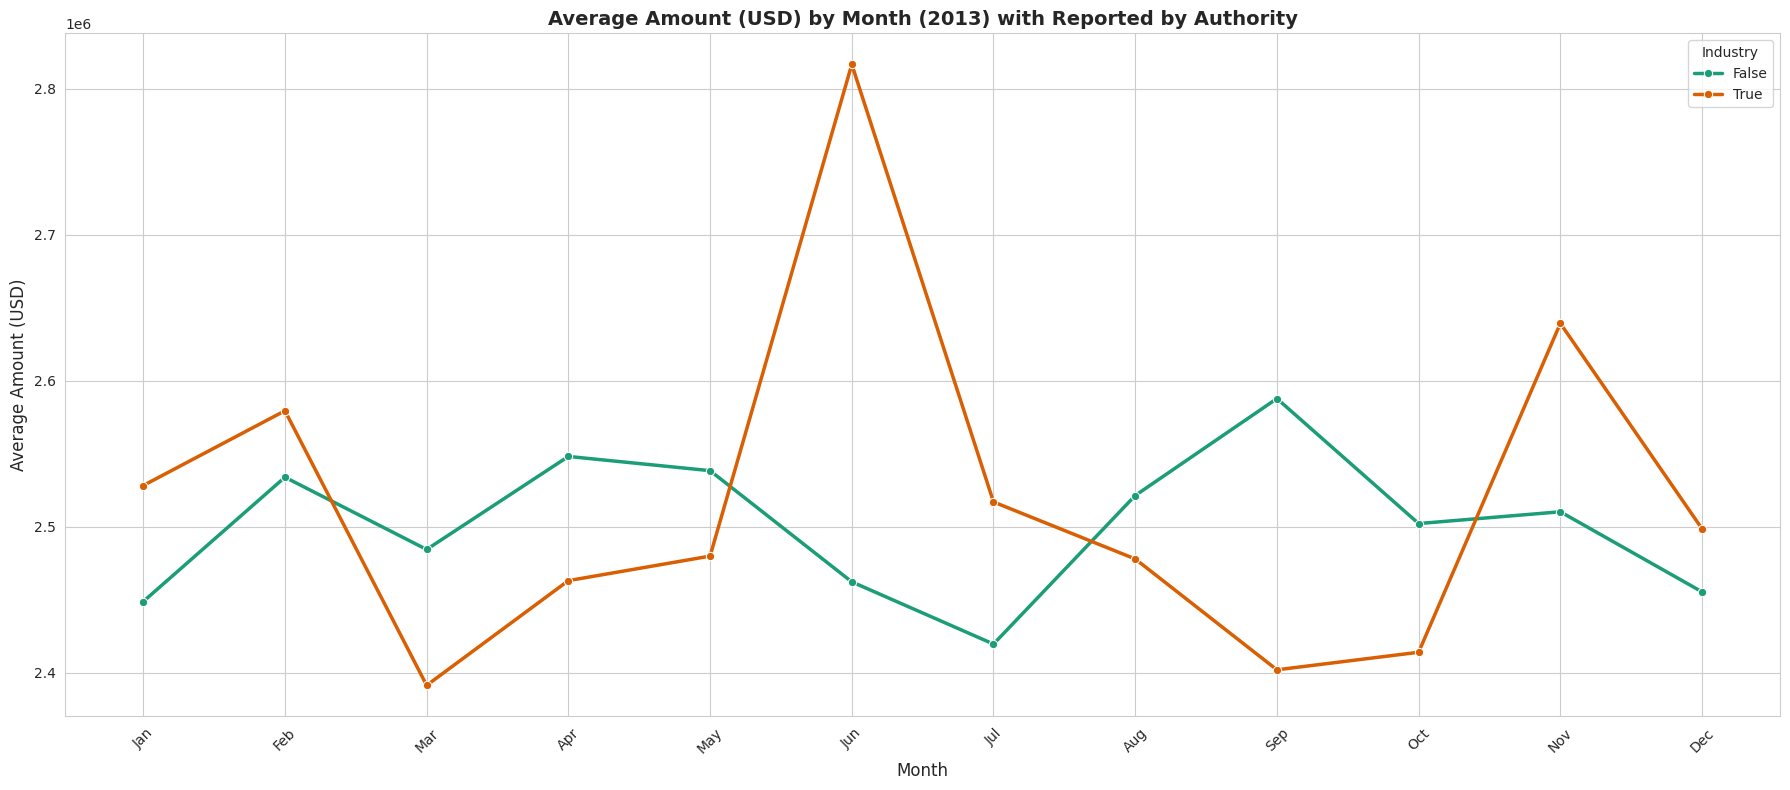

In [40]:
# Convert 'Date of Transaction' to datetime
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])

# Add a column for the month
df['Month'] = df['Date of Transaction'].dt.month

# Calculate monthly averages grouped by Month and Industry
monthly_avg = df.groupby(['Month', 'Reported by Authority'])['Amount (USD)'].mean().reset_index()

# Create a single plot for monthly averages with hue
plt.figure(figsize=(18, 8))
sns.lineplot(data=monthly_avg, x='Month', y='Amount (USD)', marker='o', hue='Reported by Authority', palette='Dark2', linewidth=2.5)

# Plot aesthetics
plt.title('Average Amount (USD) by Month (2013) with Reported by Authority', fontsize=14, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Amount (USD)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.legend(title='Industry')
plt.show()

The line plot shows the average amount (USD) for each month of 2013, comparing whether the transactions were reported by authority (True) or not reported (False).
There is a clear pattern showing that the reported transactions (True) tend to have higher average amounts compared to the non-reported transactions (False).

March and November have significant spikes in the average amount for reported transactions, with March showing a notable peak for reported transactions.

June stands out with a sharp dip in reported transactions, suggesting a drastic drop in the average amount during this period.

For non-reported transactions, the values are more consistent, but still lower than the reported transactions overall, with slight fluctuations throughout the year.

#**Feature Importance Analysis: Use machine learning models (e.g., Random Forest) to identify the most impactful features for predicting risk.**

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [42]:
# Selecting relevant features and the target variable
features = [
    "Amount (USD)",
    "Shell Companies Involved",
    "Transaction Type",
    "Country",
    "Destination Country",
    "Tax Haven Country"
]
target = "Money Laundering Risk Score"

In [43]:
# Encoding categorical variables using LabelEncoder
label_encoders = {}
for col in ["Transaction Type", "Country", "Destination Country", "Tax Haven Country"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [44]:
# Splitting the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training a Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

The Random Forest model is used here to analyze feature importance for predicting the Money Laundering Risk Score. By training the model, we can identify which features contribute the most in determining the risk score. The most important features can be determined by checking the feature importances from the trained model.

In [45]:
# Extracting feature importances
feature_importances = rf_model.feature_importances_

# Creating a DataFrame for feature importance visualization
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

<ipython-input-46-d3dfc979c706>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")


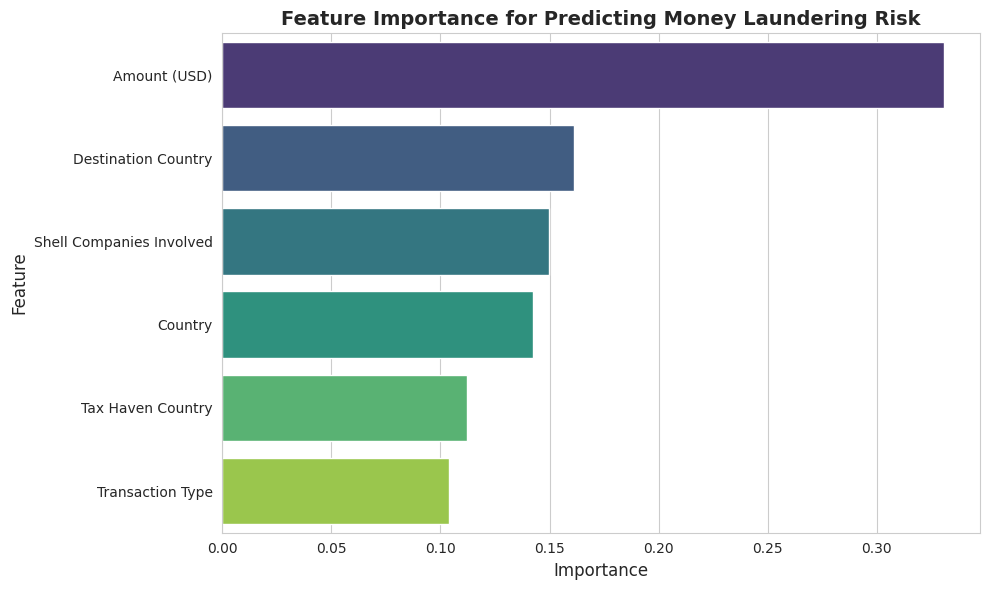

,Feature,Importance
0,Amount (USD),0.330802
4,Destination Country,0.161096
1,Shell Companies Involved,0.149669
3,Country,0.142247
5,Tax Haven Country,0.112240
2,Transaction Type,0.103946


In [46]:
# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance for Predicting Money Laundering Risk", fontsize=14, weight='bold')
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

importance_df

Key Insights:
Amount (USD) is the most important feature for predicting the Money Laundering Risk Score with an importance of 0.3308.
The Destination Country follows closely with an importance of 0.1611.
Shell Companies Involved also plays a significant role, with an importance of 0.1469.
Transaction Type, Country, and Tax Haven Country are relatively less impactful compared to the top three.

#**Model Development**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# Extract date features
df['Year'] = df['Date of Transaction'].dt.year
df['Month'] = df['Date of Transaction'].dt.month
df['Day'] = df['Date of Transaction'].dt.day
df['Weekday'] = df['Date of Transaction'].dt.weekday

In [ ]:
columns = ['Country', 'Amount (USD)' ,'Transaction Type', 'Date of Transaction', 'Destination Country','Source of Money', 'Reported by Authority']
df_mapped = df[columns]

In [ ]:
df_mapped

,Country,Amount (USD),Transaction Type,Date of Transaction,Destination Country,Source of Money,Reported by Authority
0,0,3.267530e+06,2,2013-01-01 00:00:00,9,Illegal,True
1,1,4.965767e+06,4,2013-01-01 01:00:00,5,Illegal,False
2,8,9.416750e+04,4,2013-01-01 02:00:00,6,Illegal,True
3,7,3.864201e+05,0,2013-01-01 03:00:00,3,Illegal,False
4,5,6.433784e+05,1,2013-01-01 04:00:00,9,Illegal,True
...,...,...,...,...,...,...,...
9995,4,2.209229e+06,2,2014-02-21 11:00:00,0,Illegal,False
9996,7,4.800338e+06,3,2014-02-21 12:00:00,3,Legal,False
9997,8,4.891953e+05,4,2014-02-21 13:00:00,3,Illegal,False
9998,0,2.233581e+06,2,2014-02-21 14:00:00,3,Illegal,True


In [ ]:
def map_strings_to_numbers(df, columns):
    """
    Maps strings to unique numbers for the specified columns in a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        columns (list): A list of column names to map strings to numbers.

    Returns:
        pd.DataFrame: The modified DataFrame with mapped columns.
        dict: A dictionary where keys are column names and values are the mapping dictionaries.
    """
    mapping_dict = {}

    for column in columns:
        if column in df.columns:
            # Generate a mapping dictionary for the column
            unique_values = df[column].unique()
            mapping = {value: idx for idx, value in enumerate(unique_values)}
            mapping_dict[column] = mapping

            # Map the column using the generated mapping
            df[column] = df[column].map(mapping)
        else:
            raise ValueError(f"Column '{column}' does not exist in the DataFrame.")

    return df, mapping_dict

map_cols= ['Country', 'Amount (USD)' ,'Transaction Type', 'Destination Country','Source of Money', 'Reported by Authority']
df_mapped, mappings = map_strings_to_numbers(df, map_cols)

In [ ]:
df_mapped_sub = df_mapped[columns]

In [ ]:
df_mapped_sub.head()

,Country,Amount (USD),Transaction Type,Date of Transaction,Destination Country,Source of Money,Reported by Authority
0,0,0,0,2013-01-01 00:00:00,0,0,0
1,1,1,1,2013-01-01 01:00:00,1,0,1
2,2,2,1,2013-01-01 02:00:00,2,0,0
3,3,3,2,2013-01-01 03:00:00,3,0,1
4,4,4,3,2013-01-01 04:00:00,0,0,0


Above code prepares the data for modeling by extracting additional date features and encoding categorical variables into numerical values. This step is crucial for machine learning models like random forests, neural networks (LSTM), or any model that requires numerical input features.








In [ ]:
train_size = int(len(df_mapped_sub) * 0.7)
test_size = len(df_mapped_sub) - train_size
train, test = df_mapped_sub[:train_size], df_mapped_sub[train_size:]

In [ ]:
import numpy as np

def create_dataset(dataset, target_columns_indices=[4,5], lookback=100):
    """Transform a time series into a prediction dataset with multiple features and multiple target columns"""
    X, y = [], []
    for i in range(len(dataset)-lookback):
        # Convert the DataFrame slice to a numpy array, excluding the target columns
        feature = dataset.iloc[i:i+lookback].drop(dataset.columns[target_columns_indices], axis=1).values

        # Select targets (multiple target columns)
        targets = dataset.iloc[i+lookback, target_columns_indices].values

        X.append(feature)
        y.append(targets)

    return np.array(X), np.array(y)

In [ ]:
lookback = 300
train = train[['Country', 'Amount (USD)', 'Transaction Type', 'Destination Country', 'Source of Money', 'Reported by Authority']]
test = test[['Country', 'Amount (USD)', 'Transaction Type', 'Destination Country', 'Source of Money', 'Reported by Authority']]

In [ ]:
# train

In [ ]:
X_train, y_train = create_dataset(train, lookback=100)
X_test, y_test = create_dataset(test, lookback=100)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6900, 100, 4) (6900, 2)
(2900, 100, 4) (2900, 2)


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

In [ ]:
# skip it not needed
# from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
# from tensorflow.keras.optimizers import Adam

# # Define LSTM input layer
# input_layer = Input(shape=(100, X_train.shape[2]))

# # Shared LSTM layer
# shared_lstm = LSTM(units=128, activation='relu', kernel_initializer='he_normal', return_sequences=True)(input_layer)
# # shared_lstm = LSTM(units=128, activation='relu', return_sequences=True)(shared_lstm)
# shared_lstm = LSTM(units=64, kernel_initializer='he_normal', activation='relu')(shared_lstm)
# print(shared_lstm.shape)
# # Add Dropout to prevent overfitting
# shared_lstm = Dropout(0.4)(shared_lstm)

# # Model 1: Dense layer for first target (target1)
# output1 = Dense(1, activation='sigmoid', name='target1')(shared_lstm)

# # Model 2: Dense layer for second target (target2)
# output2 = Dense(1, activation='sigmoid', name='target2')(shared_lstm)

# # Create the final model with two outputs
# model = Model(inputs=input_layer, outputs=[output1, output2])

# # Compile the model
# optimizer = Adam(learning_rate=0.001, clipvalue=1.0)
# model.compile(optimizer=optimizer, loss={'target1': 'binary_crossentropy', 'target2': 'binary_crossentropy'},
#               metrics={'target1': 'accuracy', 'target2': 'accuracy'})

# # Train the model
# history = model.fit(X_train, {'target1': y_train[:, 0], 'target2': y_train[:, 1]}, epochs=10, batch_size=16, validation_data=(X_test, {'target1': y_test[:, 0], 'target2': y_test[:, 1]}))

In [ ]:
# # Evaluate the model
# loss, target1_loss, target2_loss, target1_mae, target2_accuracy = model.evaluate(X_test, {'target1': y_test[:, 0], 'target2': y_test[:, 1]})
# print(f"Test Loss: {loss}")
# print(f"Test Target1 Loss: {target1_loss}")
# print(f"Test Target2 Loss: {target2_loss}")
# print(f"Test Target1 Accuracy: {target1_mae}")
# print(f"Test Target2 Accuracy: {target2_accuracy}")


In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import classification_report

# # Extract loss and accuracy from history
# history_dict = history.history

# # Plot loss
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.plot(history_dict['target1_loss'], label='Target 1 Loss')
# plt.plot(history_dict['val_target1_loss'], label='Val Target 1 Loss')
# plt.plot(history_dict['target2_loss'], label='Target 2 Loss')
# plt.plot(history_dict['val_target2_loss'], label='Val Target 2 Loss')
# plt.title('Loss per Epoch')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# # Plot accuracy
# plt.subplot(1, 2, 2)
# plt.plot(history_dict['target1_accuracy'], label='Target 1 Accuracy')
# plt.plot(history_dict['val_target1_accuracy'], label='Val Target 1 Accuracy')
# plt.plot(history_dict['target2_accuracy'], label='Target 2 Accuracy')
# plt.plot(history_dict['val_target2_accuracy'], label='Val Target 2 Accuracy')
# plt.title('Accuracy per Epoch')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.tight_layout()
# plt.show()


In [ ]:
# import numpy as np

# # Predict on the test set
# predictions = model.predict(X_test)

# # Classification report for Target 1
# target1_pred = np.argmax(predictions[0], axis=1)  # Assuming classification task
# target1_true = y_test[:, 0]
# print("Classification Report for Target 1:")
# print(classification_report(target1_true, target1_pred))


# # Classification report for Target 2
# target2_pred = np.argmax(predictions[1], axis=1)  # Assuming classification task
# target2_true = y_test[:, 1]
# print("Classification Report for Target 2:")
# print(classification_report(target2_true, target2_pred))

# Feature Probs

First train the model and then get the prediction to get the feature things.

First train the model and then get the prediction to get the feature things

This code defines a multi-task learning model using a neural network architecture built with TensorFlow and Keras. The model processes sequential input data, structured as time steps with multiple features, using stacked Long Short-Term Memory (LSTM) layers to extract temporal patterns and meaningful representations. These layers are configured with decreasing units to progressively distill the information. An attention mechanism is incorporated to assign weights to the time steps, emphasizing the most relevant features in the sequence. This attention mechanism calculates scores for each time step, normalizes them, and applies these scores to the LSTM outputs to create a weighted representation of the sequence. The weighted features are flattened and passed through a dense layer for further transformation, followed by a dropout layer to mitigate overfitting. The model is designed to predict two different binary targets simultaneously, using two separate dense layers for the outputs. It is optimized using the Adam optimizer with a learning rate scheduler and gradient clipping to stabilize training. The model is trained on labeled data, with the training process tracking accuracy and loss metrics for both targets.

In [ ]:
lookback = 150
train = train[['Country', 'Amount (USD)', 'Transaction Type', 'Destination Country', 'Source of Money', 'Reported by Authority']]
test = test[['Country', 'Amount (USD)', 'Transaction Type', 'Destination Country', 'Source of Money', 'Reported by Authority']]

In [ ]:
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6850, 150, 4) (6850, 2)
(2850, 150, 4) (2850, 2)


In [133]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Bidirectional,LSTM, Dense, Dropout, Multiply, Permute, Activation,Flatten, Dot, LayerNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define LSTM input layer
input_layer = Input(shape=(lookback, X_train.shape[2]))

# Shared LSTM layer
shared_lstm = Bidirectional(LSTM(units=128, activation='relu', kernel_initializer='he_normal', return_sequences=True))(input_layer)
shared_lstm1 = LSTM(units=64, kernel_initializer='he_normal', activation='relu', return_sequences=True)(shared_lstm)
shared_lstm2 = LSTM(units=4, kernel_initializer='he_normal', activation='relu', return_sequences=True)(shared_lstm1)

# Attention mechanism for getting the attention weights and features this will hep us in indentifying
# the factor which is involved according to the model
attention = Dense(4, activation='tanh')(shared_lstm2)  # Learn a score for each timestep
attention = Activation('softmax', name='feature_attention')(attention)  # Normalize scores

# Reshape attention to match LSTM output shape...just reshaping to match the size
attention = tf.keras.layers.Permute((2, 1))(attention)   # Align axes for multiplication
attention = tf.keras.layers.Permute((2, 1))(attention)   # Align axes for multiplication

# Apply attention to LSTM outputs
weighted_features = Multiply()([shared_lstm2, attention])
weighted_features = Dot(axes=(1, 1))([shared_lstm2, weighted_features])  # (batch_size, features, 1)

weighted_features = Flatten()(weighted_features)
normalized_features = LayerNormalization()(weighted_features)
weighted_sum = Dense(64, activation='relu')(normalized_features)
# Add Dropout to prevent overfitting
dropout_layer = Dropout(0.4)(weighted_sum)
# tanh_layer = Activation('tanh')(dropout_layer)
# Model 1: Dense layer for first target (target1)
output1 = Dense(1, activation='sigmoid', name='target1')(dropout_layer)
# output1 = Dense(1, activation='sigmoid', name='target1')(tanh_layer)

# Model 2: Dense layer for second target (target2)
output2 = Dense(1, activation='sigmoid', name='target2')(dropout_layer)
# output2 = Dense(1, activation='sigmoid', name='target2')(tanh_layer)
# Create the final model with two outputs
model = Model(inputs=input_layer, outputs=[output1, output2])

# Compile the model
optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)
# optimizer = Adam(learning_rate=0.0008)
model.compile(optimizer=optimizer, loss={'target1': 'binary_crossentropy', 'target2': 'binary_crossentropy'},
              metrics={'target1': 'accuracy', 'target2': 'accuracy'})

# Train the model
history = model.fit(X_train, {'target1': y_train[:, 0], 'target2': y_train[:, 1]},
                    epochs=30, batch_size=32,
                    validation_data=(X_test, {'target1': y_test[:, 0], 'target2': y_test[:, 1]}))

Epoch 1/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 163s 706ms/step - loss: 1.4704 - target1_accuracy: 0.6139 - target1_loss: 0.6707 - target2_accuracy: 0.4448 - target2_loss: 0.7996 - val_loss: 1.2455 - val_target1_accuracy: 0.7018 - val_target1_loss: 0.6137 - val_target2_accuracy: 0.7751 - val_target2_loss: 0.6352
Epoch 2/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 199s 693ms/step - loss: 1.2454 - target1_accuracy: 0.6586 - target1_loss: 0.6486 - target2_accuracy: 0.7070 - target2_loss: 0.5968 - val_loss: 1.1479 - val_target1_accuracy: 0.7018 - val_target1_loss: 0.6136 - val_target2_accuracy: 0.7989 - val_target2_loss: 0.5449
Epoch 3/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 204s 704ms/step - loss: 1.1957 - target1_accuracy: 0.6828 - target1_loss: 0.6378 - target2_accuracy: 0.7772 - target2_loss: 0.5579 - val_loss: 1.1273 - val_target1_accuracy: 0.7018 - val_target1_loss: 0.6150 - val_target2_accuracy: 0.7989 - val_target2_loss: 0.5223
Epoch 4/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 199s 689ms/step - loss: 1.1838 - target1_a

In [134]:
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 4)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 150, 256)       │        136,192 │ input_layer[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 150, 64)        │         82,176 │ bidirectional[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 150, 4)         │          1,104 │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 150, 4)         │             20 │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ feature_attention         │ (None, 150, 4)         │              0 │ dense[0][0]            │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ permute (Permute)         │ (None, 4, 150)         │              0 │ feature_attention[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ permute_1 (Permute)       │ (None, 150, 4)         │              0 │ permute[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply (Multiply)       │ (None, 150, 4)         │              0 │ lstm_2[0][0],          │
│                           │                        │                │ permute_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dot (Dot)                 │ (None, 4, 4)           │              0 │ lstm_2[0][0],          │
│                           │                        │                │ multiply[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 16)             │              0 │ dot[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 16)             │             32 │ flatten[0][0]          │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          1,088 │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 64)             │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ target1 (Dense)           │ (None, 1)              │             65 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ target2 (Dense)           │ (None, 1)              │             65 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 662,228 (2.53 MB)

 Trainable params: 220,742 (862.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 441,486 (1.68 MB)

None


In [135]:
# Evaluate the model
loss, target1_loss, target2_loss, target1_mae, target2_accuracy = model.evaluate(X_test, {'target1': y_test[:, 0], 'target2': y_test[:, 1]})
print(f"Test Loss: {loss}")
print(f"Test Target1 Loss: {target1_loss}")
print(f"Test Target2 Loss: {target2_loss}")
print(f"Test Target1 Accuracy: {target1_mae}")
print(f"Test Target2 Accuracy: {target2_accuracy}")


90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 210ms/step - loss: 1.1013 - target1_accuracy: 0.7087 - target1_loss: 0.6047 - target2_accuracy: 0.8027 - target2_loss: 0.4969
Test Loss: 1.1121163368225098
Test Target1 Loss: 0.6118130087852478
Test Target2 Loss: 0.5130696892738342
Test Target1 Accuracy: 0.7017543911933899
Test Target2 Accuracy: 0.7989473938941956


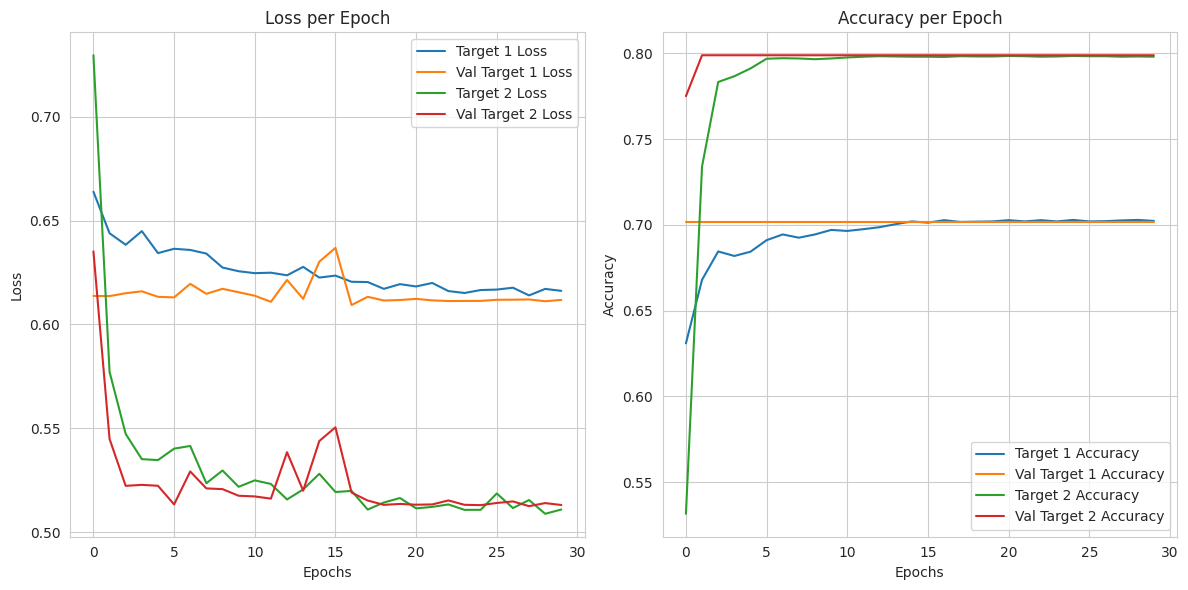

In [136]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Extract loss and accuracy from history
history_dict = history.history

# Plot loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['target1_loss'], label='Target 1 Loss')
plt.plot(history_dict['val_target1_loss'], label='Val Target 1 Loss')
plt.plot(history_dict['target2_loss'], label='Target 2 Loss')
plt.plot(history_dict['val_target2_loss'], label='Val Target 2 Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dict['target1_accuracy'], label='Target 1 Accuracy')
plt.plot(history_dict['val_target1_accuracy'], label='Val Target 1 Accuracy')
plt.plot(history_dict['target2_accuracy'], label='Target 2 Accuracy')
plt.plot(history_dict['val_target2_accuracy'], label='Val Target 2 Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [137]:
import numpy as np
from sklearn.metrics import classification_report

# Predict on the test set
predictions = model.predict(X_test)

# Process predictions for binary classification
target1_pred = (predictions[0] > 0.5).astype(int).flatten()
target2_pred = (predictions[1] > 0.5).astype(int).flatten()

# True labels
target1_true = y_test[:, 0].astype(int).flatten()
target2_true = y_test[:, 1].astype(int).flatten()

# Classification report for Target 1
print("Classification Report for Target 1:")
print(classification_report(target1_true, target1_pred))

# Classification report for Target 2
print("Classification Report for Target 2:")
print(classification_report(target2_true, target2_pred))


90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 200ms/step
Classification Report for Target 1:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82      2000
           1       0.00      0.00      0.00       850

    accuracy                           0.70      2850
   macro avg       0.35      0.50      0.41      2850
weighted avg       0.49      0.70      0.58      2850

Classification Report for Target 2:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       573
           1       0.80      1.00      0.89      2277

    accuracy                           0.80      2850
   macro avg       0.40      0.50      0.44      2850
weighted avg       0.64      0.80      0.71      2850



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

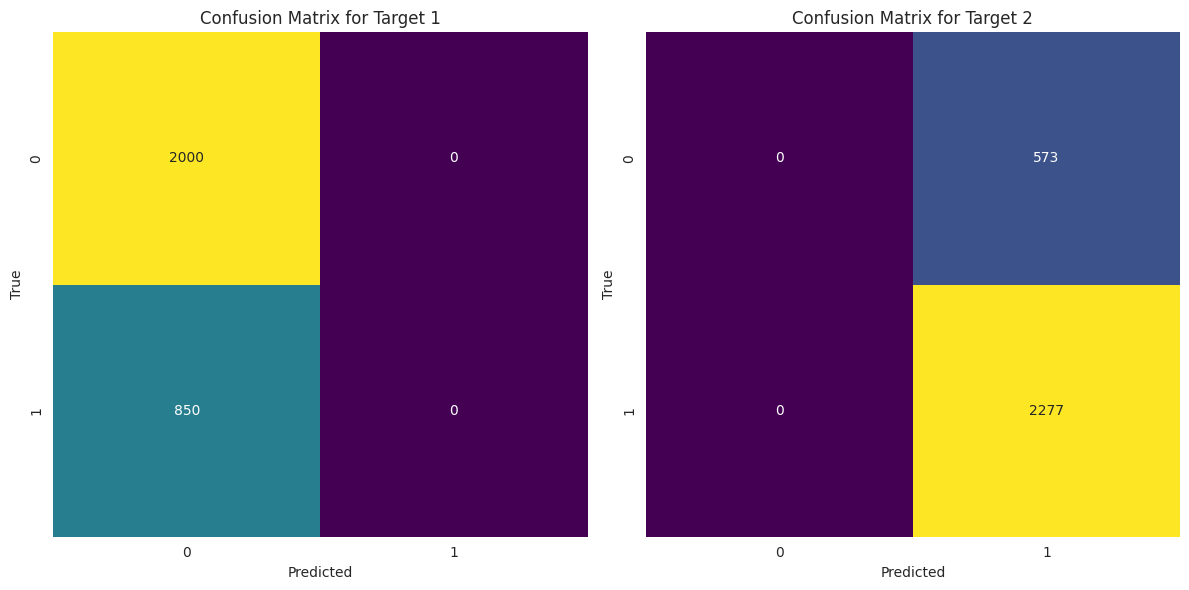

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
conf_matrix_target1 = confusion_matrix(target1_true, target1_pred)
conf_matrix_target2 = confusion_matrix(target2_true, target2_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(ax, conf_matrix, title):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=False, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(title)

# Create subplots for side-by-side confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot confusion matrices
plot_confusion_matrix(axes[0], conf_matrix_target1, "Confusion Matrix for Target 1")
plot_confusion_matrix(axes[1], conf_matrix_target2, "Confusion Matrix for Target 2")

# Adjust layout
plt.tight_layout()
plt.show()


In [140]:
def print_feature_probabilities(model, data, feature_names=None):
    # Extract the attention layer output
    attention_model = Model(inputs=model.input, outputs=model.get_layer('feature_attention').output)

    # Get attention weights for the input data
    attention_weights = attention_model.predict(data)  # Predict attention weights

    # Iterate over each sample in the data
    for sample_idx in range(len(data)):
        print(f"Sample {sample_idx + 1} Feature Probabilities:")

        # Aggregate probabilities over timesteps (sum across timesteps)
        feature_probs = attention_weights[sample_idx].sum(axis=0)
        feature_probs /= feature_probs.sum()

        # Find the feature with the maximum probability
        max_prob_idx = feature_probs.argmax()  # Index of the feature with the max probability
        max_prob_value = feature_probs[max_prob_idx]  # Value of the max probability
        max_prob_feature = None
        # Display feature probabilities (using feature names or indices)
        if feature_names:
            for feature, prob in zip(feature_names, feature_probs):
                if prob == max_prob_value:
                    max_prob_feature = feature
                print(f"  {feature}: {prob:.4f}")
            print(f"Feature with max probability: {max_prob_feature}")
        else:
            for feature_idx, prob in enumerate(feature_probs):
                print(f"  Feature {feature_idx + 1}: {prob:.4f}")
            print(f"Feature with max probability: 'Feature {max_prob_idx + 1}' with probability: {max_prob_value:.4f}")
        print()

# Predict probabilities on X_test
predictions = model.predict(X_test)

# The predictions will be a list of two arrays: one for each target (target1 and target2)
prob_target1 = predictions[0]  # Probabilities for target1
prob_target2 = predictions[1]  # Probabilities for target2

# Print the predictions and feature probabilities for each sample
for i in range(len(X_test)):
    print(f"Sample {i + 1} Predictions:")
    print(f"  Target1 probability: {prob_target1[i][0]:.4f}")
    print(f"  Target2 probability: {prob_target2[i][0]:.4f}")
    print("Feature Probabilities:")

    # If you have feature names, pass them, otherwise use indices
    feature_names = ['Country', 'Amount (USD)', 'Transaction Type', 'Destination Country']
    print_feature_probabilities(model, X_test[i:i+1], feature_names)  # Pass one sample at a time
    print("---")

90/90 ━━━━━━━━━━━━━━━━━━━━ 17s 188ms/step
Sample 1 Predictions:
  Target1 probability: 0.3111
  Target2 probability: 0.7932
Feature Probabilities:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step
Sample 1 Feature Probabilities:
  Country: 0.2302
  Amount (USD): 0.2557
  Transaction Type: 0.2333
  Destination Country: 0.2809
Feature with max probability: Destination Country

---
Sample 2 Predictions:
  Target1 probability: 0.3116
  Target2 probability: 0.7925
Feature Probabilities:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Sample 1 Feature Probabilities:
  Country: 0.2272
  Amount (USD): 0.2552
  Transaction Type: 0.2372
  Destination Country: 0.2804
Feature with max probability: Destination Country

---
Sample 3 Predictions:
  Target1 probability: 0.3012
  Target2 probability: 0.7958
Feature Probabilities:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step
Sample 1 Feature Probabilities:
  Country: 0.2194
  Amount (USD): 0.2644
  Transaction Type: 0.2312
  Destination Country: 0.2850
Feature with max probability:

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step
Sample 1 Feature Probabilities:
  Country: 0.2257
  Amount (USD): 0.2537
  Transaction Type: 0.2357
  Destination Country: 0.2848
Feature with max probability: Destination Country

---
Sample 5 Predictions:
  Target1 probability: 0.3013
  Target2 probability: 0.7956
Feature Probabilities:


Streaming output truncated to the last 5000 lines.
Sample 1 Feature Probabilities:
  Country: 0.2399
  Amount (USD): 0.2654
  Transaction Type: 0.2271
  Destination Country: 0.2676
Feature with max probability: Destination Country

---
Sample 2467 Predictions:
  Target1 probability: 0.3118
  Target2 probability: 0.7830
Feature Probabilities:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step
Sample 1 Feature Probabilities:
  Country: 0.2321
  Amount (USD): 0.2736
  Transaction Type: 0.2301
  Destination Country: 0.2642
Feature with max probability: Amount (USD)

---
Sample 2468 Predictions:
  Target1 probability: 0.2964
  Target2 probability: 0.8044
Feature Probabilities:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Sample 1 Feature Probabilities:
  Country: 0.2355
  Amount (USD): 0.2561
  Transaction Type: 0.2108
  Destination Country: 0.2976
Feature with max probability: Destination Country

---
Sample 2469 Predictions:
  Target1 probability: 0.3069
  Target2 probability: 0.8016
Feature Probabilities:
1/

Each sample prediction consists of:

Target 1 Probability: The model's predicted probability for the first target (e.g., a binary or multiclass classification task like whether a transaction is suspicious or not).

Target 2 Probability: The model's predicted probability for the second target (e.g., another classification task such as whether the transaction was reported by authorities or not).


Sample 1 Predictions:
Target 1 Probability: 0.3021
Target 2 Probability: 0.7984

This means the model predicts that:
For Target 1, the probability of the predicted class (e.g., "suspicious") is 30.21%.

For Target 2, the probability of the predicted class (e.g., "reported by authority") is 79.84%.

These values give insights into how confident the model is in its predictions for each sample.
The attention mechanism in your model assigns probabilities (or weights) to each feature for every sample, which shows the importance of each feature in making the prediction.

**For example:**

Sample 1 Feature Probabilities:

Country: 0.2515

Amount (USD): 0.2549

Transaction Type: 0.2427

Destination Country: 0.2508

Feature with max probability: Amount (USD)


Country: Has 25.15% weight in the prediction for this sample.
Amount (USD): Has 25.49% weight (highest in this case), indicating it is the most important feature influencing the model's prediction for this transaction.

Transaction Type and Destination Country: Each contributes around 24%, meaning they also significantly affect the prediction.

These weights help us understand the relative contribution of each feature to the model’s decision-making process for a specific sample.

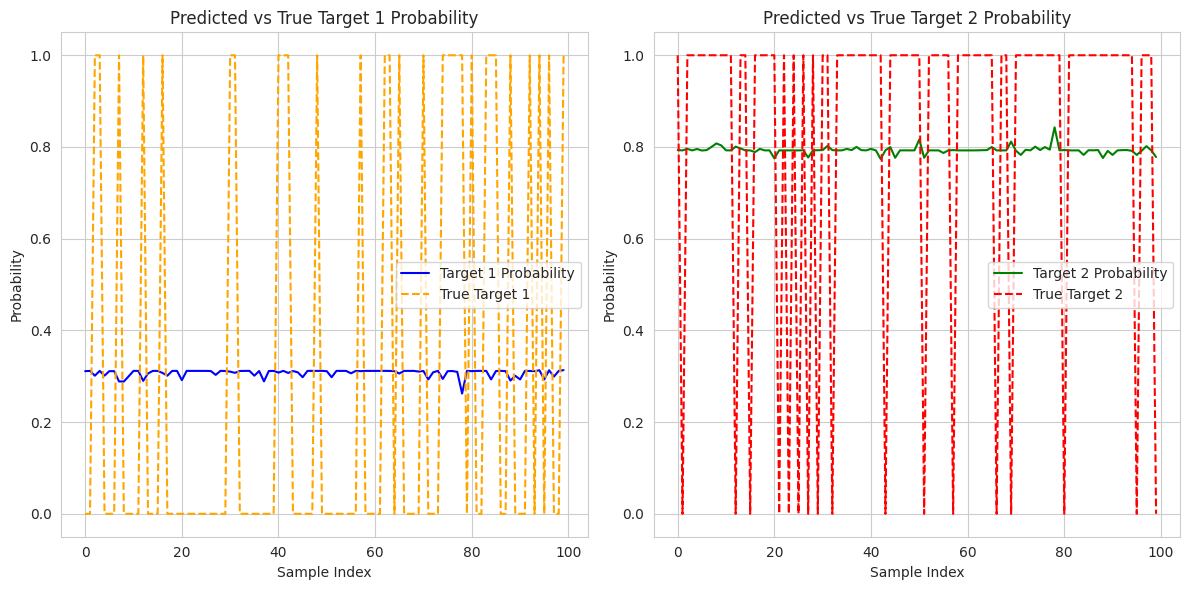

In [141]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting predicted probabilities for each sample
def plot_predictions(predictions, y_test, sample_range):
    prob_target1 = predictions[0]  # Predicted probabilities for Target 1
    prob_target2 = predictions[1]  # Predicted probabilities for Target 2

    plt.figure(figsize=(12, 6))

    # Plot Target 1 predictions
    plt.subplot(1, 2, 1)
    plt.plot(sample_range, prob_target1[sample_range], label='Target 1 Probability', color='blue')
    plt.plot(sample_range, y_test[sample_range, 0], label='True Target 1', color='orange', linestyle='dashed')
    plt.title('Predicted vs True Target 1 Probability')
    plt.xlabel('Sample Index')
    plt.ylabel('Probability')
    plt.legend()

    # Plot Target 2 predictions
    plt.subplot(1, 2, 2)
    plt.plot(sample_range, prob_target2[sample_range], label='Target 2 Probability', color='green')
    plt.plot(sample_range, y_test[sample_range, 1], label='True Target 2', color='red', linestyle='dashed')
    plt.title('Predicted vs True Target 2 Probability')
    plt.xlabel('Sample Index')
    plt.ylabel('Probability')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Visualize the predictions (for the first 100 samples, for example)
plot_predictions(predictions, y_test, sample_range=range(100))


**Left Plot: Predicted vs True Target 1 Probability**

Solid Blue Line: Represents the predicted probability of Target 1 by the model.
Dashed Orange Line: Represents the true labels (binary: 0 or 1) for Target 1.

Insights:
Flat Blue Line at ~0.5: The model appears to be predicting probabilities around 0.5 for most samples. This suggests that the model may not have confidence in its predictions for Target 1 or is struggling to distinguish between classes.

Misalignment with True Labels: There is a significant discrepancy between the dashed orange (true labels) and the blue line (predicted probabilities). This indicates that the model's predictions for Target 1 are not reliable and need improvement.

Poor Learning for Target 1: The model might require more training, better feature selection, or parameter tuning to improve accuracy for Target 1.


**Right Plot: Predicted vs True Target 2 Probability**

Solid Green Line: Represents the predicted probability of Target 2 by the model.
Dashed Red Line: Represents the true labels (binary: 0 or 1) for Target 2.

Insights:
Closer Alignment Between Lines: The green line (predicted probabilities) aligns relatively well with the dashed red line (true labels). This suggests that the model performs better for Target 2 than for Target 1.

Consistent Predictions: For many samples, the green line is either close to 0 or 1, indicating the model has higher confidence in its predictions for Target 2.

Better Learning for Target 2: The model is successfully capturing patterns for Target 2 and making more accurate predictions.

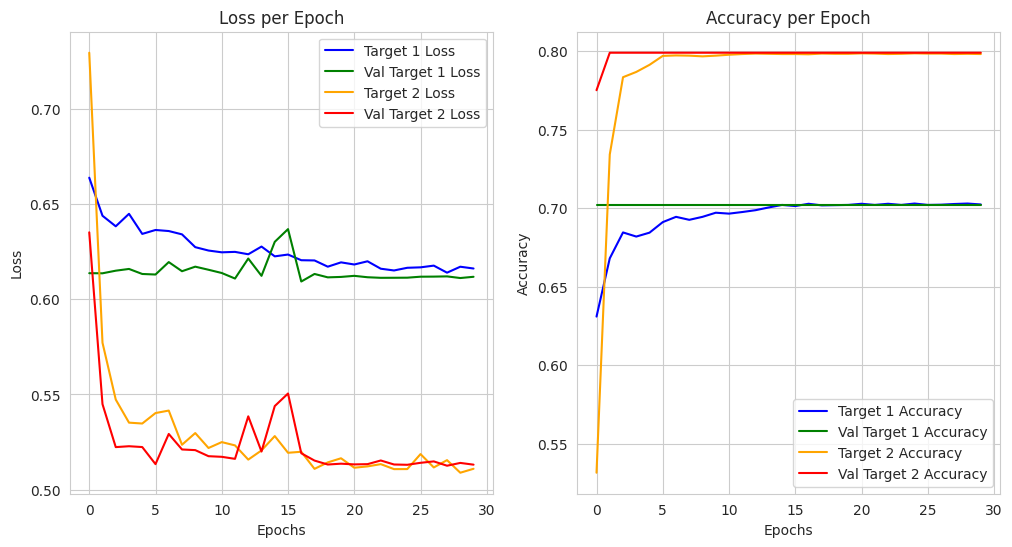

In [142]:
# Plot model loss and accuracy during training
def plot_training_history(history_dict):
    # Plot training and validation loss
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history_dict['target1_loss'], label='Target 1 Loss', color='blue')
    plt.plot(history_dict['val_target1_loss'], label='Val Target 1 Loss', color='green')
    plt.plot(history_dict['target2_loss'], label='Target 2 Loss', color='orange')
    plt.plot(history_dict['val_target2_loss'], label='Val Target 2 Loss', color='red')
    plt.title('Loss per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history_dict['target1_accuracy'], label='Target 1 Accuracy', color='blue')
    plt.plot(history_dict['val_target1_accuracy'], label='Val Target 1 Accuracy', color='green')
    plt.plot(history_dict['target2_accuracy'], label='Target 2 Accuracy', color='orange')
    plt.plot(history_dict['val_target2_accuracy'], label='Val Target 2 Accuracy', color='red')
    plt.title('Accuracy per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


# Visualize the model training history (assumes you have 'history.history' object from training)
plot_training_history(history_dict=history.history)


**Left Plot: Loss per Epoch**

Target 1 Loss (Blue) and Validation Loss (Green):
Initially, both training and validation losses are high but decrease significantly during the first few epochs.

The flattening of the loss curves indicates that the model has converged for Target 1, with little to no further improvement in loss.

Target 2 Loss (Orange) and Validation Loss (Red):

Loss for Target 2 follows a similar trend, rapidly decreasing in the early epochs and stabilizing after a few epochs.

Validation loss remains relatively stable, indicating that the model does not overfit significantly for Target 2.

Insights:
1: The model learns quickly for both targets, as evident from the steep decrease in loss during the first few epochs.

2: The stabilization of validation loss suggests that the model generalizes reasonably well, but the validation loss for Target 2 is significantly lower than Target 1.


**Right Plot: Accuracy per Epoch**

Target 1 Accuracy (Blue) and Validation Accuracy (Green):

Training accuracy improves over epochs but stabilizes at around 70%.
Validation accuracy is consistent with training accuracy, indicating that the model generalizes well for Target 1 but struggles to go beyond 70%.

Target 2 Accuracy (Orange) and Validation Accuracy (Red):

Training accuracy starts high and stabilizes at approximately 80%.
Validation accuracy mirrors training accuracy, suggesting robust learning for Target 2.

Insights:

The model performs better for Target 2, achieving higher accuracy (80%) compared to Target 1 (70%).

Validation accuracy closely tracks training accuracy, indicating that the model is not overfitting significantly for either target.

The plateau in accuracy suggests that the current model architecture, features, or hyperparameters may be limiting further improvement.